In [ ]:
import pandas as pd
import psycopg2
import datetime
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Connect to the PostgreSQL database
def connect_database():
    conn = psycopg2.connect(
        host="127.0.0.1",
        port="5432",
        database="tack_mar11",
        user="postgres",
        password="postgres"
    )
    return conn

# Execute an SQL query and fetch data into a DataFrame
def fetch_data(conn, query):
    try:
        # Use the connection to execute the query
        cursor = conn.cursor()
        cursor.execute(query)
        
        # Fetch all the rows into a DataFrame
        data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
        
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")

In [2]:
connection = connect_database()

query1 = "SELECT subject_id, eye_data, game_type FROM public.eyes_data"
df_eye = fetch_data(connection, query1)

# Fetch data from the second table (public.sensor_data)
query2 = "SELECT subject_id, data, game_type FROM public.sensor_data"
df_sensor = fetch_data(connection, query2)

# Fetch data from the third table (public.task_switching)
query3 = "SELECT userid, data FROM public.task_switching"
df_task_switch = fetch_data(connection, query3)

# Fetch data from the fourth table (public.working_memory)
query4 = "SELECT userid, data FROM public.working_memory"
df_working_memory = fetch_data(connection, query4)

# Fetch data from the fourth table (public.working_memory)
query5 = "SELECT userid, data FROM public.enumeration"
df_enumeration= fetch_data(connection, query5)

In [4]:
# # Save df_eye
# df_eye.to_pickle('df_eye.pkl')

# # Save df_sensor
# df_sensor.to_pickle('df_sensor.pkl')

# # Save df_task_switch
# df_task_switch.to_pickle('df_task_switch.pkl')

# # Save df_working_memory
# df_working_memory.to_pickle('df_working_memory.pkl')

# # Save df_enumeration
# df_enumeration.to_pickle('df_enumeration.pkl')

# READ files from pkl

In [6]:
# Load df_eye
df_eye = pd.read_pickle('df_eye.pkl')

# Load df_sensor
df_sensor = pd.read_pickle('df_sensor.pkl')

# Load df_task_switch
df_task_switch = pd.read_pickle('df_task_switch.pkl')

# Load df_working_memory
df_working_memory = pd.read_pickle('df_working_memory.pkl')

# Load df_enumeration
df_enumeration = pd.read_pickle('df_enumeration.pkl')

In [7]:
def convert_timestamp_column(df, column_name):
    # Convert the column to numeric (assuming the values are in string format)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # 'coerce' converts non-numeric values to NaN
    
    # Drop rows with NaN values (if needed)
    df.dropna(subset=[column_name], inplace=True)
    
    # Convert the Unix timestamp to a datetime object
    df['Datetime'] = pd.to_datetime(df[column_name], unit='s')
    
    # Extract month, day, hour, minute, and second
    df['Month'] = df['Datetime'].dt.strftime('%m')
    df['Day'] = df['Datetime'].dt.strftime('%d')
    df['Hour'] = df['Datetime'].dt.strftime('%H')
    df['Minute'] = df['Datetime'].dt.strftime('%M')
    df['Second'] = df['Datetime'].dt.strftime('%S')
    
    # Replace the original column with the new datetime column
    df[column_name] = df['Datetime']
    
    # Drop the 'Datetime' column if our no longer need it
    df.drop(columns=['Datetime'], inplace=True)
    
    return df

# Eye data

In [8]:
df_eye.head(10)

,subject_id,eye_data,game_type
0,FTLD,"{'Timestamp': [1706214802942.952, 170621480295...",baseline
1,FTLD,"{'Timestamp': [1706215190064.446, 170621519006...",enumeration
2,FTLD,"{'Timestamp': [1706215654609.838, 170621565462...",task_switching
3,FTLD,"{'Timestamp': [1706216240676.163, 170621624068...",working_memory
4,FYDR,"{'Timestamp': [1707937458263.966, 170793745827...",baseline
5,FYDR,"{'Timestamp': [1707938795139.16, 1707938795150...",enumeration
6,FYDR,"{'Timestamp': [1707939286914.364, 170793928692...",task_switching
7,FYDR,"{'Timestamp': [1707937879109.311, 170793787911...",working_memory
8,GTYU,"{'Timestamp': [1705523263174.649, 170552326320...",baseline
9,GTYU,"{'Timestamp': [1705525455686.529, 170552545569...",enumeration


In [9]:
# Create a function to extract and flatten the dictionaries
def extract_dict(row, key):
    if key in row:
        return row[key]
    else:
        return None

In [10]:
# Extract and flatten each dictionary key into separate columns
for key in df_eye ['eye_data'].iloc[0].keys():
    df_eye[key] = df_eye['eye_data'].apply(lambda x: extract_dict(x, key))

# Drop the original 'eye_data' column
df_eye.drop(columns='eye_data', inplace=True)

In [11]:
# Define a function to handle 'None' values and convert to NumPy array
def handle_none_and_convert_to_numpy(data):
    cleaned_data = [np.nan if val == 'None' else float(val) for val in data]
    return np.array(cleaned_data)

# Apply the function to the relevant columns in df1
df_eye['Timestamp'] = df_eye['Timestamp'].apply(handle_none_and_convert_to_numpy)
df_eye['Gaze_X'] = df_eye['Gaze_X'].apply(handle_none_and_convert_to_numpy)
df_eye['Gaze_Y'] = df_eye['Gaze_Y'].apply(handle_none_and_convert_to_numpy)
df_eye['Pupil_left'] = df_eye['Pupil_left'].apply(handle_none_and_convert_to_numpy)
df_eye['Pupil_right'] = df_eye['Pupil_right'].apply(handle_none_and_convert_to_numpy)

In [12]:
df_eye["subject_id"].unique()

array(['FTLD', 'FYDR', 'GTYU', 'LKPW', 'STWXJ', 'VBNM', 'DKLQ', 'JHGF',
       'MYTZ', 'PKJH', 'QWRT', 'QXZW', 'SBQRG', 'SJWQP', 'SVTZM', 'SXVBN',
       'TYDF', 'WERT', 'XZPT', 'ZYXW', 'HJKL', 'QAXY', 'SBTBT', 'SNMVN',
       'UYGH', 'VNPL', 'ZRTY', 'ZXCV', 'LRTB', 'MTYH', 'PLRQ', 'RQWE',
       'SHYXZ', 'SLMJK', 'SPKZR', 'SRKLP', 'UPLK', 'MJUY', 'QPMN', 'WZXE',
       'GHJK', 'FTYP', 'LPDW', 'NVBX', 'UYTR', 'XRTY', 'OPKJ', 'JKLZ',
       'NMBV', 'VFTY', 'GHFJ', 'test', 'TEST', 'MNBW', 'LPZV'],
      dtype=object)

In [13]:
df_eye.head()

,subject_id,game_type,Timestamp,Gaze_X,Gaze_Y,Pupil_left,Pupil_right
0,FTLD,baseline,"[1706214802942.952, 1706214802953.118, 1706214...","[nan, 0.303438127040863, 0.2914828360080719, 0...","[nan, 0.4650748670101166, 0.4200263917446136, ...","[nan, 3.67144775390625, 3.740264892578125, 4.2...","[nan, 3.911712646484375, 3.9871826171875, 4.48..."
1,FTLD,enumeration,"[1706215190064.446, 1706215190069.082, 1706215...","[nan, 0.563696563243866, 0.5746460556983948, 0...","[nan, 0.5644633769989014, 0.5497506260871887, ...","[nan, 3.948333740234375, 3.872039794921875, 3....","[nan, 4.0646514892578125, 3.983917236328125, 4..."
2,FTLD,task_switching,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3..."
3,FTLD,working_memory,"[1706216240676.163, 1706216240688.188, 1706216...","[nan, 0.3288822174072265, 0.3140820860862732, ...","[nan, 0.3967130184173584, 0.3283558487892151, ...","[nan, 3.7064056396484375, 3.735260009765625, 4...","[nan, 3.808349609375, 3.871429443359375, 4.193..."
4,FYDR,baseline,"[1707937458263.966, 1707937458275.459, 1707937...","[nan, 0.2543805539608001, 0.2369121015071869, ...","[nan, 0.4861628711223602, 0.4622146785259247, ...","[nan, 2.5002593994140625, 2.534027099609375, 2...","[nan, 2.682891845703125, 2.729843139648437, 2...."


In [14]:
# Create an empty list to store the datetime values
date_values = []

# Iterate through each row and process the lists of timestamps
for timestamp_list in df_eye['Timestamp']:
    # Initialize an empty list to store the converted timestamps for this row
    row_dates = []
    
    # Process each Unix timestamp in the list and convert to datetime
    for timestamp in timestamp_list:
        date = pd.to_datetime(timestamp, unit='ms')
        row_dates.append(date)
    
    # Append the list of datetime values for this row to date_values
    date_values.append(row_dates)

# Create a new column in the DataFrame to store the datetime values
df_eye['Dates'] = date_values

In [ ]:
df_eye.head()

,subject_id,game_type,Timestamp,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates
0,FTLD,baseline,"[1706214802942.952, 1706214802953.118, 1706214...","[nan, 0.303438127040863, 0.2914828360080719, 0...","[nan, 0.4650748670101166, 0.4200263917446136, ...","[nan, 3.67144775390625, 3.740264892578125, 4.2...","[nan, 3.911712646484375, 3.9871826171875, 4.48...","[2024-01-25 20:33:22.942951936, 2024-01-25 20:..."
1,FTLD,enumeration,"[1706215190064.446, 1706215190069.082, 1706215...","[nan, 0.563696563243866, 0.5746460556983948, 0...","[nan, 0.5644633769989014, 0.5497506260871887, ...","[nan, 3.948333740234375, 3.872039794921875, 3....","[nan, 4.0646514892578125, 3.983917236328125, 4...","[2024-01-25 20:39:50.064445952, 2024-01-25 20:..."
2,FTLD,task_switching,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:..."
3,FTLD,working_memory,"[1706216240676.163, 1706216240688.188, 1706216...","[nan, 0.3288822174072265, 0.3140820860862732, ...","[nan, 0.3967130184173584, 0.3283558487892151, ...","[nan, 3.7064056396484375, 3.735260009765625, 4...","[nan, 3.808349609375, 3.871429443359375, 4.193...","[2024-01-25 20:57:20.676163072, 2024-01-25 20:..."
4,FYDR,baseline,"[1707937458263.966, 1707937458275.459, 1707937...","[nan, 0.2543805539608001, 0.2369121015071869, ...","[nan, 0.4861628711223602, 0.4622146785259247, ...","[nan, 2.5002593994140625, 2.534027099609375, 2...","[nan, 2.682891845703125, 2.729843139648437, 2....","[2024-02-14 19:04:18.263965952, 2024-02-14 19:..."


In [ ]:
# Define a function to extract the first date from a list of datetime values
def extract_first_date(date_list):
    if isinstance(date_list, list) and len(date_list) > 0:
        return date_list[0].date()
    else:
        return None

In [ ]:
df_eye['Date'] = df_eye['Dates'].apply(extract_first_date)

In [ ]:
df_eye.head()

,subject_id,game_type,Timestamp,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates,Date
0,FTLD,baseline,"[1706214802942.952, 1706214802953.118, 1706214...","[nan, 0.303438127040863, 0.2914828360080719, 0...","[nan, 0.4650748670101166, 0.4200263917446136, ...","[nan, 3.67144775390625, 3.740264892578125, 4.2...","[nan, 3.911712646484375, 3.9871826171875, 4.48...","[2024-01-25 20:33:22.942951936, 2024-01-25 20:...",2024-01-25
1,FTLD,enumeration,"[1706215190064.446, 1706215190069.082, 1706215...","[nan, 0.563696563243866, 0.5746460556983948, 0...","[nan, 0.5644633769989014, 0.5497506260871887, ...","[nan, 3.948333740234375, 3.872039794921875, 3....","[nan, 4.0646514892578125, 3.983917236328125, 4...","[2024-01-25 20:39:50.064445952, 2024-01-25 20:...",2024-01-25
2,FTLD,task_switching,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...",2024-01-25
3,FTLD,working_memory,"[1706216240676.163, 1706216240688.188, 1706216...","[nan, 0.3288822174072265, 0.3140820860862732, ...","[nan, 0.3967130184173584, 0.3283558487892151, ...","[nan, 3.7064056396484375, 3.735260009765625, 4...","[nan, 3.808349609375, 3.871429443359375, 4.193...","[2024-01-25 20:57:20.676163072, 2024-01-25 20:...",2024-01-25
4,FYDR,baseline,"[1707937458263.966, 1707937458275.459, 1707937...","[nan, 0.2543805539608001, 0.2369121015071869, ...","[nan, 0.4861628711223602, 0.4622146785259247, ...","[nan, 2.5002593994140625, 2.534027099609375, 2...","[nan, 2.682891845703125, 2.729843139648437, 2....","[2024-02-14 19:04:18.263965952, 2024-02-14 19:...",2024-02-14


In [ ]:
# Replace values in the "game_type" column
df_eye['game_type'] = df_eye['game_type'].replace({'task_switching': 'task switch', 'working_memory': 'working memory'})

In [ ]:
df_eye["game_type"].unique()

array(['baseline', 'enumeration', 'task switch', 'working memory'],
      dtype=object)

# Sensor

In [32]:
df_sensor.head(10)

,subject_id,data,game_type
0,FTLD,"{'Timestamp': [1706214800.6816838, 1706214800....",baseline
1,FTLD,"{'Timestamp': [1706215187.819987, 1706215187.8...",enumeration
2,FTLD,"{'Timestamp': [1706215682.3754766, 1706215682....",task_switching
3,FTLD,"{'Timestamp': [1706216268.449015, 1706216268.4...",working_memory
4,FYDR,"{'Timestamp': [1707937486.03142, 1707937486.03...",baseline
5,FYDR,"{'Timestamp': [1707938822.9154432, 1707938822....",enumeration
6,FYDR,"{'Timestamp': [1707939284.6775262, 1707939284....",task_switching
7,FYDR,"{'Timestamp': [1707937906.8756409, 1707937906....",working_memory
8,GTYU,"{'Timestamp': [1705523260.9872038, 1705523260....",baseline
9,GTYU,"{'Timestamp': [1705525453.4308228, 1705525453....",enumeration


In [33]:
# Extract and flatten each dictionary key into separate columns
for key in df_sensor['data'].iloc[0].keys():
    df_sensor[key] = df_sensor['data'].apply(lambda x: extract_dict(x, key))

# Drop the original 'eye_data' column
df_sensor.drop(columns='data', inplace=True)

In [34]:
df_sensor.head()

,subject_id,game_type,Timestamp,ecg_data,eda_data
0,FTLD,baseline,"[1706214800.6816838, 1706214800.6856835, 17062...","[210.0, 208.0, 209.0, 208.0, 207.0, 208.0, 210...","[65.0, 66.0, 66.0, 66.0, 65.0, 67.0, 66.0, 66...."
1,FTLD,enumeration,"[1706215187.819987, 1706215187.823987, 1706215...","[232.0, 231.0, 230.0, 230.0, 228.0, 231.0, 229...","[67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67...."
2,FTLD,task_switching,"[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67...."
3,FTLD,working_memory,"[1706216268.449015, 1706216268.4530146, 170621...","[212.0, 202.0, 198.0, 196.0, 197.0, 195.0, 198...","[66.0, 66.0, 66.0, 66.0, 67.0, 66.0, 67.0, 66...."
4,FYDR,baseline,"[1707937486.03142, 1707937486.03542, 170793748...","[147.0, 147.0, 151.0, 155.0, 157.0, 163.0, 164...","[64.0, 68.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65...."


In [35]:
# Apply the function to the relevant columns in df1
df_sensor['Timestamp'] = df_sensor['Timestamp'].apply(handle_none_and_convert_to_numpy)
df_sensor['ecg_data'] = df_sensor['ecg_data'].apply(handle_none_and_convert_to_numpy)
df_sensor['eda_data'] = df_sensor['eda_data'].apply(handle_none_and_convert_to_numpy)

In [36]:
# Create an empty list to store the datetime values
date_values = []

# Iterate through each row and process the lists of timestamps
for timestamp_list in df_sensor['Timestamp']:
    # Initialize an empty list to store the converted timestamps for this row
    row_dates = []
    
    # Process each Unix timestamp in the list and convert to datetime
    for timestamp in timestamp_list:
        date = pd.to_datetime(timestamp, unit='s')
        row_dates.append(date)
    
    # Append the list of datetime values for this row to date_values
    date_values.append(row_dates)

# Create a new column in the DataFrame to store the datetime values
df_sensor['Dates'] = date_values

In [37]:
df_sensor['Date'] = df_sensor['Dates'].apply(extract_first_date)

In [38]:
df_sensor['game_type'] = df_sensor['game_type'].replace({'task_switching': 'task switch', 'working_memory': 'working memory'})

In [39]:
df_sensor.head()

,subject_id,game_type,Timestamp,ecg_data,eda_data,Dates,Date
0,FTLD,baseline,"[1706214800.6816838, 1706214800.6856835, 17062...","[210.0, 208.0, 209.0, 208.0, 207.0, 208.0, 210...","[65.0, 66.0, 66.0, 66.0, 65.0, 67.0, 66.0, 66....","[2024-01-25 20:33:20.681683712, 2024-01-25 20:...",2024-01-25
1,FTLD,enumeration,"[1706215187.819987, 1706215187.823987, 1706215...","[232.0, 231.0, 230.0, 230.0, 228.0, 231.0, 229...","[67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:39:47.819986944, 2024-01-25 20:...",2024-01-25
2,FTLD,task switch,"[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:...",2024-01-25
3,FTLD,working memory,"[1706216268.449015, 1706216268.4530146, 170621...","[212.0, 202.0, 198.0, 196.0, 197.0, 195.0, 198...","[66.0, 66.0, 66.0, 66.0, 67.0, 66.0, 67.0, 66....","[2024-01-25 20:57:48.449014784, 2024-01-25 20:...",2024-01-25
4,FYDR,baseline,"[1707937486.03142, 1707937486.03542, 170793748...","[147.0, 147.0, 151.0, 155.0, 157.0, 163.0, 164...","[64.0, 68.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65....","[2024-02-14 19:04:46.031419904, 2024-02-14 19:...",2024-02-14


# enumeration

In [40]:
# Extract and flatten each dictionary key into separate columns
for key in df_enumeration['data'].iloc[0].keys():
    df_enumeration[key] = df_enumeration['data'].apply(lambda x: extract_dict(x, key))

# Drop the original 'eye_data' column
df_enumeration.drop(columns='data', inplace=True)

In [41]:
df_enumeration.head()

,userid,Blockno,Difficulty,Start_time,End_time,Results_Responses,Results_rt,Results_targetvalue,Accuracy,Task_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1706215246776, 1706215251076, 1706215254616, ...","[1706215248785, 1706215252328, 1706215257166, ...","[6, 6, 8, 8, 5, 7, 7, 9, 5, 6, 5, 7, 5, 6, 8, ...","[2009, 1252, 2550, 1137, 1342, 1136, 1092, 133...","[6, 6, 8, 8, 5, 7, 7, 9, 5, 6, 5, 7, 5, 6, 8, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",Enumeration,0.85,0.90,0.75,0.833333
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1707938870743, 1707938875252, 1707938879802, ...","[1707938873155, 1707938877707, 1707938882142, ...","[6, 8, 8, 7, 9, 7, 7, 8, 7, 8, 5, 6, 6, 6, 8, ...","[2412, 2455, 2340, 3373, 3160, 2972, 1581, 222...","[6, 9, 9, 7, 9, 8, 7, 8, 7, 9, 5, 6, 6, 6, 8, ...","[1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",Enumeration,0.75,0.70,0.65,0.700000
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1705525496796, 1705525502396, 1705525507496, ...","[1705525500316, 1705525505414, 1705525511216, ...","[10, 13, 6, 7, 5, 6, 8, 7, 8, 8, 9, 7, 7, 7, 5...","[3520, 3018, 3720, 3867, 2775, 2309, 2604, 273...","[6, 6, 7, 9, 5, 7, 9, 8, 9, 8, 8, 7, 6, 7, 5, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",Enumeration,0.90,0.75,0.40,0.683333
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1708023735636, 1708023742196, 1708023746795, ...","[1708023740096, 1708023744703, 1708023751305, ...","[7, 5, 7, 5, 7, 7, 10, 6, 5, 5, 9, 8, 12, 11, ...","[4460, 2507, 4510, 5497, 2595, 3460, 5407, 236...","[8, 5, 7, 5, 7, 7, 9, 6, 5, 5, 8, 7, 9, 9, 9, ...","[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...",Enumeration,0.65,0.60,0.50,0.583333
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1699372976730, 1699372981911, 1699372986950, ...","[1699372979826, 1699372984861, 1699372990126, ...","[5, 6, 6, 6, 7, 8, 9, 9, 10, 7, 6, 2, 5, 9, 7,...","[3096, 2950, 3176, 1463, 4758, 4458, 3504, 385...","[6, 5, 7, 6, 7, 8, 8, 9, 9, 8, 5, 7, 5, 9, 6, ...","[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, ...",Enumeration,0.40,0.55,0.45,0.466667


In [102]:
df_enumeration['game_type'] = df_enumeration['game_type'].replace({'Enumeration': 'enumeration'})
df_enumeration.rename(columns={'Blockno': 'BlockNo'}, inplace=True)

In [42]:
# Create an empty list to store the datetime values for Start_time
start_time_values = []

# Create an empty list to store the datetime values for End_time
end_time_values = []

# Iterate through each row and process the lists of timestamps for both Start_time and End_time
for start_timestamp_list, end_timestamp_list in zip(df_enumeration['Start_time'], df_enumeration['End_time']):
    # Initialize empty lists to store the converted timestamps for this row
    start_row_dates = []
    end_row_dates = []
    
    # Process each Unix timestamp in the Start_time list and convert to datetime
    for start_timestamp in start_timestamp_list:
        start_date = pd.to_datetime(start_timestamp, unit='ms')
        start_row_dates.append(start_date)
    
    # Process each Unix timestamp in the End_time list and convert to datetime
    for end_timestamp in end_timestamp_list:
        end_date = pd.to_datetime(end_timestamp, unit='ms')
        end_row_dates.append(end_date)
    
    # Append the list of datetime values for Start_time and End_time for this row
    start_time_values.append(start_row_dates)
    end_time_values.append(end_row_dates)

# Create new columns in the DataFrame to store the datetime values for Start_time and End_time
df_enumeration['Start_time_Dates'] = start_time_values
df_enumeration['End_time_Dates'] = end_time_values

In [43]:
df_enumeration['Date'] = df_enumeration['Start_time_Dates'].apply(extract_first_date)

In [44]:
# Assuming we have a DataFrame called df_task_switch
# Rename the "userid" column to "subject_id"
df_enumeration.rename(columns={'userid': 'subject_id'}, inplace=True)

# Rename the "Task_type" column to "game_type"
df_enumeration.rename(columns={'Task_type': 'game_type'}, inplace=True)

# working_memory

In [45]:
# Extract and flatten each dictionary key into separate columns
for key in df_working_memory['data'].iloc[0].keys():
    df_working_memory[key] = df_working_memory['data'].apply(lambda x: extract_dict(x, key))

# Drop the original 'eye_data' column
df_working_memory.drop(columns='data', inplace=True)

In [46]:
df_working_memory.head()

,userid,BlockNo,Difficulty,Start_time,End_time,Results_responses,Results_rt,Results_targetvalue_stim,Results_num_stim,Results_correct,Correct Answer,Accuracy,Task_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1706216319985, 1706216326446, 1706216334145, ...","[1706216321525, 1706216328006, 1706216335725, ...","[0-1-2-3, 0-1-2, 0-1-2-3, 0-1-2-3, 0-1-2-3, 0-...","[1540, 1560, 1580, 2060, 1580, 1620, 1540, 151...","[11-8-12-10-15-2-3-4-14-6-7-5-1-9-13-0, 12-2-1...","[4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0-1-2-3, 0-1-2, 0-1-2-3, 0-1-2-3, 0-1-2-3, 0-...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",working memory,0.983333,0.991667,0.733929,0.902976
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1707937981499, 1707938003018, 1707938015978, ...","[1707937992078, 1707938006258, 1707938023478, ...","[0-1-2-3-4-14-7-5, 0-1-2-3-4-5-6-7, 0-2-1-3-5-...","[10579, 3240, 7500, 4440, 4260, 2659, 6320, 78...","[3-5-15-4-14-9-0-10-7-13-6-12-8-1-2-11, 8-13-5...","[8, 8, 7, 7, 8, 7, 8, 8, 7, 8, 7, 7, 7, 8, 8, ...","[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[0-1-2-3-4-5-6-7, 0-1-2-3-4-5-6-7, 0-1-2-3-4-5...","[0.625, 1.0, 0.2857142857142857, 0.14285714285...",working memory,1.000000,0.973333,0.675000,0.882778
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1705524577593, 1705524587853, 1705524599673, ...","[1705524580533, 1705524591153, 1705524603152, ...","[0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-4-3-5, 1-2-3-4-...","[2940, 3300, 3479, 6019, 4640, 2940, 3020, 420...","[14-7-9-6-2-11-0-1-8-15-3-4-12-5-10-13, 7-13-8...","[6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, ...","[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...","[0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-3-4-5, 0-1-2-3-...","[1.0, 1.0, 0.6666666666666666, 0.0, 0.5, 1.0, ...",working memory,0.912500,0.758333,0.352679,0.674504
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1708024933773, 1708024945432, 1708024955932, ...","[1708024936912, 1708024948612, 1708024959232, ...","[0-1-2-3-4-5, 0-12-1-3-4-5, 0-1-2-3-4, 0-1-2-3...","[3139, 3180, 3300, 5019, 2760, 2880, 3560, 284...","[13-14-7-5-11-6-12-2-0-15-9-10-1-3-8-4, 1-14-5...","[6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, ...","[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, ...","[0-1-2-3-4-5, 0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-3-...","[1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.4, ...",working memory,0.954167,0.833333,0.516071,0.767857
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1699373654297, 1699373664377, 1699373673697, ...","[1699373658237, 1699373667577, 1699373677477, ...","[0-1-2-3, 0-1-2-3, 0-1-2-3, 0-1-2, 0-1-2, 0-1-...","[3940, 3200, 3780, 3280, 2241, 2241, 2439, 266...","[10-3-14-8-11-4-12-13-6-5-9-2-0-7-1-15, 15-12-...","[4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0-1-2-3, 0-1-2-3, 0-1-2-3, 0-1-2, 0-1-2, 0-1-...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",working memory,1.000000,0.738333,0.429464,0.722599


In [47]:
# Create an empty list to store the datetime values for Start_time
start_time_values = []

# Create an empty list to store the datetime values for End_time
end_time_values = []

# Iterate through each row and process the lists of timestamps for both Start_time and End_time
for start_timestamp_list, end_timestamp_list in zip(df_working_memory['Start_time'], df_working_memory['End_time']):
    # Initialize empty lists to store the converted timestamps for this row
    start_row_dates = []
    end_row_dates = []
    
    # Process each Unix timestamp in the Start_time list and convert to datetime
    for start_timestamp in start_timestamp_list:
        start_date = pd.to_datetime(start_timestamp, unit='ms')
        start_row_dates.append(start_date)
    
    # Process each Unix timestamp in the End_time list and convert to datetime
    for end_timestamp in end_timestamp_list:
        end_date = pd.to_datetime(end_timestamp, unit='ms')
        end_row_dates.append(end_date)
    
    # Append the list of datetime values for Start_time and End_time for this row
    start_time_values.append(start_row_dates)
    end_time_values.append(end_row_dates)

# Create new columns in the DataFrame to store the datetime values for Start_time and End_time
df_working_memory['Start_time_Dates'] = start_time_values
df_working_memory['End_time_Dates'] = end_time_values

In [48]:
df_working_memory.head()

,userid,BlockNo,Difficulty,Start_time,End_time,Results_responses,Results_rt,Results_targetvalue_stim,Results_num_stim,Results_correct,Correct Answer,Accuracy,Task_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,End_time_Dates
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1706216319985, 1706216326446, 1706216334145, ...","[1706216321525, 1706216328006, 1706216335725, ...","[0-1-2-3, 0-1-2, 0-1-2-3, 0-1-2-3, 0-1-2-3, 0-...","[1540, 1560, 1580, 2060, 1580, 1620, 1540, 151...","[11-8-12-10-15-2-3-4-14-6-7-5-1-9-13-0, 12-2-1...","[4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0-1-2-3, 0-1-2, 0-1-2-3, 0-1-2-3, 0-1-2-3, 0-...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",working memory,0.983333,0.991667,0.733929,0.902976,"[2024-01-25 20:58:39.985000, 2024-01-25 20:58:...","[2024-01-25 20:58:41.525000, 2024-01-25 20:58:..."
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1707937981499, 1707938003018, 1707938015978, ...","[1707937992078, 1707938006258, 1707938023478, ...","[0-1-2-3-4-14-7-5, 0-1-2-3-4-5-6-7, 0-2-1-3-5-...","[10579, 3240, 7500, 4440, 4260, 2659, 6320, 78...","[3-5-15-4-14-9-0-10-7-13-6-12-8-1-2-11, 8-13-5...","[8, 8, 7, 7, 8, 7, 8, 8, 7, 8, 7, 7, 7, 8, 8, ...","[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[0-1-2-3-4-5-6-7, 0-1-2-3-4-5-6-7, 0-1-2-3-4-5...","[0.625, 1.0, 0.2857142857142857, 0.14285714285...",working memory,1.000000,0.973333,0.675000,0.882778,"[2024-02-14 19:13:01.499000, 2024-02-14 19:13:...","[2024-02-14 19:13:12.078000, 2024-02-14 19:13:..."
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1705524577593, 1705524587853, 1705524599673, ...","[1705524580533, 1705524591153, 1705524603152, ...","[0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-4-3-5, 1-2-3-4-...","[2940, 3300, 3479, 6019, 4640, 2940, 3020, 420...","[14-7-9-6-2-11-0-1-8-15-3-4-12-5-10-13, 7-13-8...","[6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, ...","[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...","[0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-3-4-5, 0-1-2-3-...","[1.0, 1.0, 0.6666666666666666, 0.0, 0.5, 1.0, ...",working memory,0.912500,0.758333,0.352679,0.674504,"[2024-01-17 20:49:37.593000, 2024-01-17 20:49:...","[2024-01-17 20:49:40.533000, 2024-01-17 20:49:..."
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1708024933773, 1708024945432, 1708024955932, ...","[1708024936912, 1708024948612, 1708024959232, ...","[0-1-2-3-4-5, 0-12-1-3-4-5, 0-1-2-3-4, 0-1-2-3...","[3139, 3180, 3300, 5019, 2760, 2880, 3560, 284...","[13-14-7-5-11-6-12-2-0-15-9-10-1-3-8-4, 1-14-5...","[6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, ...","[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, ...","[0-1-2-3-4-5, 0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-3-...","[1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.4, ...",working memory,0.954167,0.833333,0.516071,0.767857,"[2024-02-15 19:22:13.773000, 2024-02-15 19:22:...","[2024-02-15 19:22:16.912000, 2024-02-15 19:22:..."
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1699373654297, 1699373664377, 1699373673697, ...","[1699373658237, 1699373667577, 1699373677477, ...","[0-1-2-3, 0-1-2-3, 0-1-2-3, 0-1-2, 0-1-2, 0-1-...","[3940, 3200, 3780, 3280, 2241, 2241, 2439, 266...","[10-3-14-8-11-4-12-13-6-5-9-2-0-7-1-15, 15-12-...","[4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0-1-2-3, 0-1-2-3, 0-1-2-3, 0-1-2, 0-1-2, 0-1-...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",working memory,1.000000,0.738333,0.429464,0.722599,"[2023-11-07 16:14:14.297000, 2023-11-07 16:14:...","[2023-11-07 16:14:18.237000, 2023-11-07 16:14:..."


In [49]:
df_working_memory['Date'] = df_working_memory['Start_time_Dates'].apply(extract_first_date)

In [50]:
# Assuming our have a DataFrame called df_task_switch
# Rename the "userid" column to "subject_id"
df_working_memory.rename(columns={'userid': 'subject_id'}, inplace=True)

# Rename the "Task_type" column to "game_type"
df_working_memory.rename(columns={'Task_type': 'game_type'}, inplace=True)

In [51]:
df_working_memory.head()

,subject_id,BlockNo,Difficulty,Start_time,End_time,Results_responses,Results_rt,Results_targetvalue_stim,Results_num_stim,Results_correct,Correct Answer,Accuracy,game_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,End_time_Dates,Date
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1706216319985, 1706216326446, 1706216334145, ...","[1706216321525, 1706216328006, 1706216335725, ...","[0-1-2-3, 0-1-2, 0-1-2-3, 0-1-2-3, 0-1-2-3, 0-...","[1540, 1560, 1580, 2060, 1580, 1620, 1540, 151...","[11-8-12-10-15-2-3-4-14-6-7-5-1-9-13-0, 12-2-1...","[4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0-1-2-3, 0-1-2, 0-1-2-3, 0-1-2-3, 0-1-2-3, 0-...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",working memory,0.983333,0.991667,0.733929,0.902976,"[2024-01-25 20:58:39.985000, 2024-01-25 20:58:...","[2024-01-25 20:58:41.525000, 2024-01-25 20:58:...",2024-01-25
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1707937981499, 1707938003018, 1707938015978, ...","[1707937992078, 1707938006258, 1707938023478, ...","[0-1-2-3-4-14-7-5, 0-1-2-3-4-5-6-7, 0-2-1-3-5-...","[10579, 3240, 7500, 4440, 4260, 2659, 6320, 78...","[3-5-15-4-14-9-0-10-7-13-6-12-8-1-2-11, 8-13-5...","[8, 8, 7, 7, 8, 7, 8, 8, 7, 8, 7, 7, 7, 8, 8, ...","[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[0-1-2-3-4-5-6-7, 0-1-2-3-4-5-6-7, 0-1-2-3-4-5...","[0.625, 1.0, 0.2857142857142857, 0.14285714285...",working memory,1.000000,0.973333,0.675000,0.882778,"[2024-02-14 19:13:01.499000, 2024-02-14 19:13:...","[2024-02-14 19:13:12.078000, 2024-02-14 19:13:...",2024-02-14
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1705524577593, 1705524587853, 1705524599673, ...","[1705524580533, 1705524591153, 1705524603152, ...","[0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-4-3-5, 1-2-3-4-...","[2940, 3300, 3479, 6019, 4640, 2940, 3020, 420...","[14-7-9-6-2-11-0-1-8-15-3-4-12-5-10-13, 7-13-8...","[6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, ...","[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...","[0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-3-4-5, 0-1-2-3-...","[1.0, 1.0, 0.6666666666666666, 0.0, 0.5, 1.0, ...",working memory,0.912500,0.758333,0.352679,0.674504,"[2024-01-17 20:49:37.593000, 2024-01-17 20:49:...","[2024-01-17 20:49:40.533000, 2024-01-17 20:49:...",2024-01-17
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1708024933773, 1708024945432, 1708024955932, ...","[1708024936912, 1708024948612, 1708024959232, ...","[0-1-2-3-4-5, 0-12-1-3-4-5, 0-1-2-3-4, 0-1-2-3...","[3139, 3180, 3300, 5019, 2760, 2880, 3560, 284...","[13-14-7-5-11-6-12-2-0-15-9-10-1-3-8-4, 1-14-5...","[6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, ...","[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, ...","[0-1-2-3-4-5, 0-1-2-3-4-5, 0-1-2-3-4, 0-1-2-3-...","[1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.4, ...",working memory,0.954167,0.833333,0.516071,0.767857,"[2024-02-15 19:22:13.773000, 2024-02-15 19:22:...","[2024-02-15 19:22:16.912000, 2024-02-15 19:22:...",2024-02-15
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1699373654297, 1699373664377, 1699373673697, ...","[1699373658237, 1699373667577, 1699373677477, ...","[0-1-2-3, 0-1-2-3, 0-1-2-3, 0-1-2, 0-1-2, 0-1-...","[3940, 3200, 3780, 3280, 2241, 2241, 2439, 266...","[10-3-14-8-11-4-12-13-6-5-9-2-0-7-1-15, 15-12-...","[4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0-1-2-3, 0-1-2-3, 0-1-2-3, 0-1-2, 0-1-2, 0-1-...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",working memory,1.000000,0.738333,0.429464,0.722599,"[2023-11-07 16:14:14.297000, 2023-11-07 16:14:...","[2023-11-07 16:14:18.237000, 2023-11-07 16:14:...",2023-11-07


# Task Switch

In [52]:
# Extract and flatten each dictionary key into separate columns
for key in df_task_switch['data'].iloc[0].keys():
    df_task_switch[key] = df_task_switch['data'].apply(lambda x: extract_dict(x, key))

# Drop the original 'eye_data' column
df_task_switch.drop(columns='data', inplace=True)

In [53]:
df_task_switch.head()

,userid,Blockno,Difficulty,Start_time,End_time,Results_Responses,Results_rt,Results_ind_switch,Results_indtask,Results_trail_target,Correct action,Hit/Miss,Accuracy,Task_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1706215775697, 1706215776856, 1706215777996, ...","[1706215776176, 1706215777316, 1706215778376, ...","[1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, ...","[479, 460, 380, 400, 440, 500, 420, 420, 440, ...","[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, ...","[1, 9, 9, 7, 9, 3, 4, 8, 4, 3, 3, 9, 3, 2, 8, ...","[1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.913580,0.950617,0.925926,0.930041
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1707939387102, 1707939388642, 1707939389822, ...","[1707939387962.0, 1707939389142.0, 17079393903...","[1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, ...","[860.0, 500.0, 500.0, 661.0, 820.0, 720.0, 520...","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[4, 6, 6, 7, 2, 1, 4, 8, 4, 2, 1, 8, 2, 8, 8, ...","[1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.987654,0.987654,0.876543,0.950617
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1705523830807, 1705523832927, 1705523834288, ...","[1705523832247.0, 1705523833607.0, 17055238348...","[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, ...","[1440.0, 680.0, 579.0, 820.0, 940.0, 720.0, 84...","[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, ...","[9, 1, 4, 4, 4, 8, 2, 8, 3, 9, 8, 9, 8, 1, 9, ...","[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.987654,0.888889,0.703704,0.860082
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1708024342873, 1708024346553, 1708024348873, ...","[None, 1708024348193.0, 1708024349973.0, 17080...","[0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...","[None, 1640.0, 1100.0, 620.0, 920.0, 1800.0, 8...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...","[7, 7, 1, 7, 2, 8, 7, 2, 2, 4, 6, 8, 9, 7, 4, ...","[1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.925926,0.987654,0.851852,0.921811
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1699374920101, 1699374922781, 1699374924321, ...","[None, 1699374923641.0, 1699374924941.0, 16993...","[0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, ...","[None, 860.0, 620.0, 560.0, 620.0, 1000.0, 521...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...","[2, 8, 7, 1, 8, 2, 8, 1, 6, 3, 6, 6, 3, 7, 3, ...","[2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.913580,0.975309,0.753086,0.880658


In [54]:
# Create empty lists to store the datetime values for Start_time and End_time
start_time_values = []
end_time_values = []

# Iterate through each row and process the lists of timestamps for both Start_time and End_time
for start_timestamp_list, end_timestamp_list in zip(df_task_switch['Start_time'], df_task_switch['End_time']):
    # Initialize empty lists to store the converted timestamps for this row
    start_row_dates = []
    end_row_dates = []

    # Process each Unix timestamp in the Start_time list and convert to datetime
    for start_timestamp in start_timestamp_list:
        try:
            if start_timestamp is not None:
                start_date = pd.to_datetime(start_timestamp, unit='ms')
                start_row_dates.append(start_date)
        except (ValueError, TypeError):
            # Handle the exception or skip the value if it can't be converted
            pass

    # Process each Unix timestamp in the End_time list and convert to datetime
    for end_timestamp in end_timestamp_list:
        try:
            if end_timestamp is not None:
                end_date = pd.to_datetime(end_timestamp, unit='ms')
                end_row_dates.append(end_date)
        except (ValueError, TypeError):
            # Handle the exception or skip the value if it can't be converted
            pass

    # Append the list of datetime values for Start_time and End_time for this row
    start_time_values.append(start_row_dates)
    end_time_values.append(end_row_dates)

# Create new columns in the DataFrame to store the datetime values for Start_time and End_time
df_task_switch['Start_time_Dates'] = start_time_values
df_task_switch['End_time_Dates'] = end_time_values

In [55]:
# Assuming we have a DataFrame called df_task_switch
# Rename the "userid" column to "subject_id"
df_task_switch.rename(columns={'userid': 'subject_id'}, inplace=True)

# Rename the "Task_type" column to "game_type"
df_task_switch.rename(columns={'Task_type': 'game_type'}, inplace=True)

In [56]:
df_task_switch['Date'] = df_task_switch['Start_time_Dates'].apply(extract_first_date)

In [57]:
df_task_switch.head(12)

,subject_id,Blockno,Difficulty,Start_time,End_time,Results_Responses,Results_rt,Results_ind_switch,Results_indtask,Results_trail_target,...,Hit/Miss,Accuracy,game_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,End_time_Dates,Date
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1706215775697, 1706215776856, 1706215777996, ...","[1706215776176, 1706215777316, 1706215778376, ...","[1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, ...","[479, 460, 380, 400, 440, 500, 420, 420, 440, ...","[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, ...","[1, 9, 9, 7, 9, 3, 4, 8, 4, 3, 3, 9, 3, 2, 8, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.913580,0.950617,0.925926,0.930041,"[2024-01-25 20:49:35.697000, 2024-01-25 20:49:...","[2024-01-25 20:49:36.176000, 2024-01-25 20:49:...",2024-01-25
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1707939387102, 1707939388642, 1707939389822, ...","[1707939387962.0, 1707939389142.0, 17079393903...","[1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, ...","[860.0, 500.0, 500.0, 661.0, 820.0, 720.0, 520...","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[4, 6, 6, 7, 2, 1, 4, 8, 4, 2, 1, 8, 2, 8, 8, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.987654,0.987654,0.876543,0.950617,"[2024-02-14 19:36:27.102000, 2024-02-14 19:36:...","[2024-02-14 19:36:27.961999872, 2024-02-14 19:...",2024-02-14
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1705523830807, 1705523832927, 1705523834288, ...","[1705523832247.0, 1705523833607.0, 17055238348...","[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, ...","[1440.0, 680.0, 579.0, 820.0, 940.0, 720.0, 84...","[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, ...","[9, 1, 4, 4, 4, 8, 2, 8, 3, 9, 8, 9, 8, 1, 9, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.987654,0.888889,0.703704,0.860082,"[2024-01-17 20:37:10.807000, 2024-01-17 20:37:...","[2024-01-17 20:37:12.247000064, 2024-01-17 20:...",2024-01-17
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1708024342873, 1708024346553, 1708024348873, ...","[None, 1708024348193.0, 1708024349973.0, 17080...","[0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...","[None, 1640.0, 1100.0, 620.0, 920.0, 1800.0, 8...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...","[7, 7, 1, 7, 2, 8, 7, 2, 2, 4, 6, 8, 9, 7, 4, ...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.925926,0.987654,0.851852,0.921811,"[2024-02-15 19:12:22.873000, 2024-02-15 19:12:...","[2024-02-15 19:12:28.192999936, 2024-02-15 19:...",2024-02-15
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1699374920101, 1699374922781, 1699374924321, ...","[None, 1699374923641.0, 1699374924941.0, 16993...","[0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, ...","[None, 860.0, 620.0, 560.0, 620.0, 1000.0, 521...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...","[2, 8, 7, 1, 8, 2, 8, 1, 6, 3, 6, 6, 3, 7, 3, ...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.913580,0.975309,0.753086,0.880658,"[2023-11-07 16:35:20.101000, 2023-11-07 16:35:...","[2023-11-07 16:35:23.640999936, 2023-11-07 16:...",2023-11-07
5,V

In [58]:
df_eye.head()

,subject_id,game_type,Timestamp,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates,Date
0,FTLD,baseline,"[1706214802942.952, 1706214802953.118, 1706214...","[nan, 0.303438127040863, 0.2914828360080719, 0...","[nan, 0.4650748670101166, 0.4200263917446136, ...","[nan, 3.67144775390625, 3.740264892578125, 4.2...","[nan, 3.911712646484375, 3.9871826171875, 4.48...","[2024-01-25 20:33:22.942951936, 2024-01-25 20:...",2024-01-25
1,FTLD,enumeration,"[1706215190064.446, 1706215190069.082, 1706215...","[nan, 0.563696563243866, 0.5746460556983948, 0...","[nan, 0.5644633769989014, 0.5497506260871887, ...","[nan, 3.948333740234375, 3.872039794921875, 3....","[nan, 4.0646514892578125, 3.983917236328125, 4...","[2024-01-25 20:39:50.064445952, 2024-01-25 20:...",2024-01-25
2,FTLD,task switch,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...",2024-01-25
3,FTLD,working memory,"[1706216240676.163, 1706216240688.188, 1706216...","[nan, 0.3288822174072265, 0.3140820860862732, ...","[nan, 0.3967130184173584, 0.3283558487892151, ...","[nan, 3.7064056396484375, 3.735260009765625, 4...","[nan, 3.808349609375, 3.871429443359375, 4.193...","[2024-01-25 20:57:20.676163072, 2024-01-25 20:...",2024-01-25
4,FYDR,baseline,"[1707937458263.966, 1707937458275.459, 1707937...","[nan, 0.2543805539608001, 0.2369121015071869, ...","[nan, 0.4861628711223602, 0.4622146785259247, ...","[nan, 2.5002593994140625, 2.534027099609375, 2...","[nan, 2.682891845703125, 2.729843139648437, 2....","[2024-02-14 19:04:18.263965952, 2024-02-14 19:...",2024-02-14


In [59]:
df_task_switch.head()

,subject_id,Blockno,Difficulty,Start_time,End_time,Results_Responses,Results_rt,Results_ind_switch,Results_indtask,Results_trail_target,...,Hit/Miss,Accuracy,game_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,End_time_Dates,Date
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1706215775697, 1706215776856, 1706215777996, ...","[1706215776176, 1706215777316, 1706215778376, ...","[1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, ...","[479, 460, 380, 400, 440, 500, 420, 420, 440, ...","[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, ...","[1, 9, 9, 7, 9, 3, 4, 8, 4, 3, 3, 9, 3, 2, 8, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.913580,0.950617,0.925926,0.930041,"[2024-01-25 20:49:35.697000, 2024-01-25 20:49:...","[2024-01-25 20:49:36.176000, 2024-01-25 20:49:...",2024-01-25
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1707939387102, 1707939388642, 1707939389822, ...","[1707939387962.0, 1707939389142.0, 17079393903...","[1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, ...","[860.0, 500.0, 500.0, 661.0, 820.0, 720.0, 520...","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[4, 6, 6, 7, 2, 1, 4, 8, 4, 2, 1, 8, 2, 8, 8, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.987654,0.987654,0.876543,0.950617,"[2024-02-14 19:36:27.102000, 2024-02-14 19:36:...","[2024-02-14 19:36:27.961999872, 2024-02-14 19:...",2024-02-14
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1705523830807, 1705523832927, 1705523834288, ...","[1705523832247.0, 1705523833607.0, 17055238348...","[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, ...","[1440.0, 680.0, 579.0, 820.0, 940.0, 720.0, 84...","[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, ...","[9, 1, 4, 4, 4, 8, 2, 8, 3, 9, 8, 9, 8, 1, 9, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.987654,0.888889,0.703704,0.860082,"[2024-01-17 20:37:10.807000, 2024-01-17 20:37:...","[2024-01-17 20:37:12.247000064, 2024-01-17 20:...",2024-01-17
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1708024342873, 1708024346553, 1708024348873, ...","[None, 1708024348193.0, 1708024349973.0, 17080...","[0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...","[None, 1640.0, 1100.0, 620.0, 920.0, 1800.0, 8...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...","[7, 7, 1, 7, 2, 8, 7, 2, 2, 4, 6, 8, 9, 7, 4, ...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.925926,0.987654,0.851852,0.921811,"[2024-02-15 19:12:22.873000, 2024-02-15 19:12:...","[2024-02-15 19:12:28.192999936, 2024-02-15 19:...",2024-02-15
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1699374920101, 1699374922781, 1699374924321, ...","[None, 1699374923641.0, 1699374924941.0, 16993...","[0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, ...","[None, 860.0, 620.0, 560.0, 620.0, 1000.0, 521...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...","[2, 8, 7, 1, 8, 2, 8, 1, 6, 3, 6, 6, 3, 7, 3, ...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.913580,0.975309,0.753086,0.880658,"[2023-11-07 16:35:20.101000, 2023-11-07 16:35:...","[2023-11-07 16:35:23.640999936, 2023-11-07 16:...",2023-11-07


In [60]:
'game_type'

'game_type'

In [61]:
df_task_switch['game_type']

0     task switch
1     task switch
2     task switch
3     task switch
4     task switch
5     task switch
6     task switch
7     task switch
8     task switch
9     task switch
10    task switch
11    task switch
12    task switch
13    task switch
14    task switch
15    task switch
16    task switch
17    task switch
18    task switch
19    task switch
20    task switch
21    task switch
22    task switch
23    task switch
24    task switch
25    task switch
26    task switch
27    task switch
28    task switch
29    task switch
30    task switch
31    task switch
32    task switch
33    task switch
34    task switch
35    task switch
36    task switch
37    task switch
38    task switch
39    task switch
40    task switch
41    task switch
42    task switch
43    task switch
44    task switch
45    task switch
46    task switch
47    task switch
48    task switch
49    task switch
50    task switch
51    task switch
52    task switch
Name: game_type, dtype: object

In [62]:
len(df_eye)

214

In [63]:
len(df_task_switch)

53

In [64]:
len(df_working_memory)

50

In [65]:
len(df_sensor)

214

In [66]:
df_sensor.head()

,subject_id,game_type,Timestamp,ecg_data,eda_data,Dates,Date
0,FTLD,baseline,"[1706214800.6816838, 1706214800.6856835, 17062...","[210.0, 208.0, 209.0, 208.0, 207.0, 208.0, 210...","[65.0, 66.0, 66.0, 66.0, 65.0, 67.0, 66.0, 66....","[2024-01-25 20:33:20.681683712, 2024-01-25 20:...",2024-01-25
1,FTLD,enumeration,"[1706215187.819987, 1706215187.823987, 1706215...","[232.0, 231.0, 230.0, 230.0, 228.0, 231.0, 229...","[67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:39:47.819986944, 2024-01-25 20:...",2024-01-25
2,FTLD,task switch,"[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:...",2024-01-25
3,FTLD,working memory,"[1706216268.449015, 1706216268.4530146, 170621...","[212.0, 202.0, 198.0, 196.0, 197.0, 195.0, 198...","[66.0, 66.0, 66.0, 66.0, 67.0, 66.0, 67.0, 66....","[2024-01-25 20:57:48.449014784, 2024-01-25 20:...",2024-01-25
4,FYDR,baseline,"[1707937486.03142, 1707937486.03542, 170793748...","[147.0, 147.0, 151.0, 155.0, 157.0, 163.0, 164...","[64.0, 68.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65....","[2024-02-14 19:04:46.031419904, 2024-02-14 19:...",2024-02-14


In [67]:
df_eye.head()

,subject_id,game_type,Timestamp,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates,Date
0,FTLD,baseline,"[1706214802942.952, 1706214802953.118, 1706214...","[nan, 0.303438127040863, 0.2914828360080719, 0...","[nan, 0.4650748670101166, 0.4200263917446136, ...","[nan, 3.67144775390625, 3.740264892578125, 4.2...","[nan, 3.911712646484375, 3.9871826171875, 4.48...","[2024-01-25 20:33:22.942951936, 2024-01-25 20:...",2024-01-25
1,FTLD,enumeration,"[1706215190064.446, 1706215190069.082, 1706215...","[nan, 0.563696563243866, 0.5746460556983948, 0...","[nan, 0.5644633769989014, 0.5497506260871887, ...","[nan, 3.948333740234375, 3.872039794921875, 3....","[nan, 4.0646514892578125, 3.983917236328125, 4...","[2024-01-25 20:39:50.064445952, 2024-01-25 20:...",2024-01-25
2,FTLD,task switch,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...",2024-01-25
3,FTLD,working memory,"[1706216240676.163, 1706216240688.188, 1706216...","[nan, 0.3288822174072265, 0.3140820860862732, ...","[nan, 0.3967130184173584, 0.3283558487892151, ...","[nan, 3.7064056396484375, 3.735260009765625, 4...","[nan, 3.808349609375, 3.871429443359375, 4.193...","[2024-01-25 20:57:20.676163072, 2024-01-25 20:...",2024-01-25
4,FYDR,baseline,"[1707937458263.966, 1707937458275.459, 1707937...","[nan, 0.2543805539608001, 0.2369121015071869, ...","[nan, 0.4861628711223602, 0.4622146785259247, ...","[nan, 2.5002593994140625, 2.534027099609375, 2...","[nan, 2.682891845703125, 2.729843139648437, 2....","[2024-02-14 19:04:18.263965952, 2024-02-14 19:...",2024-02-14


In [68]:
df_task_switch.head()

,subject_id,Blockno,Difficulty,Start_time,End_time,Results_Responses,Results_rt,Results_ind_switch,Results_indtask,Results_trail_target,...,Hit/Miss,Accuracy,game_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,End_time_Dates,Date
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1706215775697, 1706215776856, 1706215777996, ...","[1706215776176, 1706215777316, 1706215778376, ...","[1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, ...","[479, 460, 380, 400, 440, 500, 420, 420, 440, ...","[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, ...","[1, 9, 9, 7, 9, 3, 4, 8, 4, 3, 3, 9, 3, 2, 8, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.913580,0.950617,0.925926,0.930041,"[2024-01-25 20:49:35.697000, 2024-01-25 20:49:...","[2024-01-25 20:49:36.176000, 2024-01-25 20:49:...",2024-01-25
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1707939387102, 1707939388642, 1707939389822, ...","[1707939387962.0, 1707939389142.0, 17079393903...","[1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, ...","[860.0, 500.0, 500.0, 661.0, 820.0, 720.0, 520...","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[4, 6, 6, 7, 2, 1, 4, 8, 4, 2, 1, 8, 2, 8, 8, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.987654,0.987654,0.876543,0.950617,"[2024-02-14 19:36:27.102000, 2024-02-14 19:36:...","[2024-02-14 19:36:27.961999872, 2024-02-14 19:...",2024-02-14
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1705523830807, 1705523832927, 1705523834288, ...","[1705523832247.0, 1705523833607.0, 17055238348...","[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, ...","[1440.0, 680.0, 579.0, 820.0, 940.0, 720.0, 84...","[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, ...","[9, 1, 4, 4, 4, 8, 2, 8, 3, 9, 8, 9, 8, 1, 9, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.987654,0.888889,0.703704,0.860082,"[2024-01-17 20:37:10.807000, 2024-01-17 20:37:...","[2024-01-17 20:37:12.247000064, 2024-01-17 20:...",2024-01-17
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1708024342873, 1708024346553, 1708024348873, ...","[None, 1708024348193.0, 1708024349973.0, 17080...","[0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...","[None, 1640.0, 1100.0, 620.0, 920.0, 1800.0, 8...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...","[7, 7, 1, 7, 2, 8, 7, 2, 2, 4, 6, 8, 9, 7, 4, ...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.925926,0.987654,0.851852,0.921811,"[2024-02-15 19:12:22.873000, 2024-02-15 19:12:...","[2024-02-15 19:12:28.192999936, 2024-02-15 19:...",2024-02-15
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1699374920101, 1699374922781, 1699374924321, ...","[None, 1699374923641.0, 1699374924941.0, 16993...","[0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, ...","[None, 860.0, 620.0, 560.0, 620.0, 1000.0, 521...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...","[2, 8, 7, 1, 8, 2, 8, 1, 6, 3, 6, 6, 3, 7, 3, ...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",task switch,0.913580,0.975309,0.753086,0.880658,"[2023-11-07 16:35:20.101000, 2023-11-07 16:35:...","[2023-11-07 16:35:23.640999936, 2023-11-07 16:...",2023-11-07


In [69]:
df_task_switch["subject_id"].unique()

array(['FTLD', 'FYDR', 'GTYU', 'LKPW', 'STWXJ', 'VBNM', 'DKLQ', 'JHGF',
       'MYTZ', 'PKJH', 'QWRT', 'QXZW', 'SBQRG', 'SJWQP', 'SVTZM', 'SXVBN',
       'TYDF', 'WERT', 'XZPT', 'ZYXW', 'HJKL', 'QAXY', 'SBTBT', 'SNMVN',
       'UYGH', 'VNPL', 'ZRTY', 'ZXCV', 'LRTB', 'MTYH', 'PLRQ', 'RQWE',
       'SHYXZ', 'SLMJK', 'SPKZR', 'SRKLP', 'UPLK', 'MJUY', 'QPMN', 'WZXE',
       'GHJK', 'FTYP', 'LPDW', 'NVBX', 'UYTR', 'XRTY', 'OPKJ', 'JKLZ',
       'NMBV', 'VFTY', 'GHFJ', 'MNBW', 'LPZV'], dtype=object)

In [70]:
df_sensor["subject_id"].unique()

array(['FTLD', 'FYDR', 'GTYU', 'LKPW', 'STWXJ', 'VBNM', 'DKLQ', 'JHGF',
       'MYTZ', 'PKJH', 'QWRT', 'QXZW', 'SBQRG', 'SJWQP', 'SVTZM', 'SXVBN',
       'TYDF', 'WERT', 'XZPT', 'ZYXW', 'HJKL', 'QAXY', 'SBTBT', 'SNMVN',
       'UYGH', 'VNPL', 'ZRTY', 'ZXCV', 'LRTB', 'MTYH', 'PLRQ', 'RQWE',
       'SHYXZ', 'SLMJK', 'SPKZR', 'SRKLP', 'UPLK', 'MJUY', 'QPMN', 'WZXE',
       'GHJK', 'FTYP', 'LPDW', 'NVBX', 'UYTR', 'XRTY', 'OPKJ', 'JKLZ',
       'NMBV', 'VFTY', 'GHFJ', 'test', 'TEST', 'MNBW', 'LPZV'],
      dtype=object)

In [71]:
df_task_switch["Date"].unique()

array([datetime.date(2024, 1, 25), datetime.date(2024, 2, 14),
       datetime.date(2024, 1, 17), datetime.date(2024, 2, 15),
       datetime.date(2023, 11, 7), datetime.date(2024, 2, 21),
       datetime.date(2024, 2, 13), datetime.date(2024, 1, 30),
       datetime.date(2024, 1, 22), datetime.date(2023, 11, 6),
       datetime.date(2023, 11, 2), datetime.date(2024, 2, 27),
       datetime.date(2023, 10, 31), datetime.date(2024, 2, 22),
       datetime.date(2024, 2, 8), datetime.date(2023, 11, 9),
       datetime.date(2024, 2, 28), datetime.date(2024, 2, 29),
       datetime.date(2024, 3, 5), datetime.date(2024, 3, 6),
       datetime.date(2024, 3, 7)], dtype=object)

In [72]:
df_sensor["Date"].unique()

array([datetime.date(2024, 1, 25), datetime.date(2024, 2, 14),
       datetime.date(2024, 1, 17), datetime.date(2024, 2, 15),
       datetime.date(2023, 11, 7), datetime.date(2024, 2, 21),
       datetime.date(2024, 2, 13), datetime.date(2024, 1, 30),
       datetime.date(2024, 1, 22), datetime.date(2023, 11, 6),
       datetime.date(2023, 11, 2), datetime.date(2024, 2, 27),
       datetime.date(2023, 10, 31), datetime.date(2024, 2, 22),
       datetime.date(2024, 2, 8), datetime.date(2023, 11, 9),
       datetime.date(2024, 2, 28), datetime.date(2024, 2, 29),
       datetime.date(2024, 3, 5), datetime.date(2024, 3, 6),
       datetime.date(2024, 3, 7)], dtype=object)

In [104]:
df_task_switch["game_type"].unique()

array(['task switch'], dtype=object)

In [103]:
df_enumeration["game_type"].unique()

array(['enumeration'], dtype=object)

In [105]:
df_sensor["game_type"].unique()

array(['baseline', 'enumeration', 'task switch', 'working memory'],
      dtype=object)

# Merging

In [106]:
df_sensor.rename(columns={'Timestamp': 'Timestamp_sensor'}, inplace=True)
df_sensor.rename(columns={'Dates': 'Dates_sensor'}, inplace=True)

In [107]:
df_sensor.head()

,subject_id,game_type,Timestamp_sensor,ecg_data,eda_data,Dates_sensor,Date
0,FTLD,baseline,"[1706214800.6816838, 1706214800.6856835, 17062...","[210.0, 208.0, 209.0, 208.0, 207.0, 208.0, 210...","[65.0, 66.0, 66.0, 66.0, 65.0, 67.0, 66.0, 66....","[2024-01-25 20:33:20.681683712, 2024-01-25 20:...",2024-01-25
1,FTLD,enumeration,"[1706215187.819987, 1706215187.823987, 1706215...","[232.0, 231.0, 230.0, 230.0, 228.0, 231.0, 229...","[67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:39:47.819986944, 2024-01-25 20:...",2024-01-25
2,FTLD,task switch,"[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:...",2024-01-25
3,FTLD,working memory,"[1706216268.449015, 1706216268.4530146, 170621...","[212.0, 202.0, 198.0, 196.0, 197.0, 195.0, 198...","[66.0, 66.0, 66.0, 66.0, 67.0, 66.0, 67.0, 66....","[2024-01-25 20:57:48.449014784, 2024-01-25 20:...",2024-01-25
4,FYDR,baseline,"[1707937486.03142, 1707937486.03542, 170793748...","[147.0, 147.0, 151.0, 155.0, 157.0, 163.0, 164...","[64.0, 68.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65....","[2024-02-14 19:04:46.031419904, 2024-02-14 19:...",2024-02-14


In [108]:
df_eye.head()

,subject_id,game_type,Timestamp_eye,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates_eye,Date
0,FTLD,baseline,"[1706214802942.952, 1706214802953.118, 1706214...","[nan, 0.303438127040863, 0.2914828360080719, 0...","[nan, 0.4650748670101166, 0.4200263917446136, ...","[nan, 3.67144775390625, 3.740264892578125, 4.2...","[nan, 3.911712646484375, 3.9871826171875, 4.48...","[2024-01-25 20:33:22.942951936, 2024-01-25 20:...",2024-01-25
1,FTLD,enumeration,"[1706215190064.446, 1706215190069.082, 1706215...","[nan, 0.563696563243866, 0.5746460556983948, 0...","[nan, 0.5644633769989014, 0.5497506260871887, ...","[nan, 3.948333740234375, 3.872039794921875, 3....","[nan, 4.0646514892578125, 3.983917236328125, 4...","[2024-01-25 20:39:50.064445952, 2024-01-25 20:...",2024-01-25
2,FTLD,task switch,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...",2024-01-25
3,FTLD,working memory,"[1706216240676.163, 1706216240688.188, 1706216...","[nan, 0.3288822174072265, 0.3140820860862732, ...","[nan, 0.3967130184173584, 0.3283558487892151, ...","[nan, 3.7064056396484375, 3.735260009765625, 4...","[nan, 3.808349609375, 3.871429443359375, 4.193...","[2024-01-25 20:57:20.676163072, 2024-01-25 20:...",2024-01-25
4,FYDR,baseline,"[1707937458263.966, 1707937458275.459, 1707937...","[nan, 0.2543805539608001, 0.2369121015071869, ...","[nan, 0.4861628711223602, 0.4622146785259247, ...","[nan, 2.5002593994140625, 2.534027099609375, 2...","[nan, 2.682891845703125, 2.729843139648437, 2....","[2024-02-14 19:04:18.263965952, 2024-02-14 19:...",2024-02-14


In [109]:
df_eye.rename(columns={'Timestamp': 'Timestamp_eye'}, inplace=True)
df_eye.rename(columns={'Dates': 'Dates_eye'}, inplace=True)

In [110]:
df_eye_sensor = pd.merge(df_eye, df_sensor, on=['subject_id', 'Date', 'game_type'], how='inner')
df_eye_sensor.head()

,subject_id,game_type,Timestamp_eye,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates_eye,Date,Timestamp_sensor,ecg_data,eda_data,Dates_sensor
0,FTLD,baseline,"[1706214802942.952, 1706214802953.118, 1706214...","[nan, 0.303438127040863, 0.2914828360080719, 0...","[nan, 0.4650748670101166, 0.4200263917446136, ...","[nan, 3.67144775390625, 3.740264892578125, 4.2...","[nan, 3.911712646484375, 3.9871826171875, 4.48...","[2024-01-25 20:33:22.942951936, 2024-01-25 20:...",2024-01-25,"[1706214800.6816838, 1706214800.6856835, 17062...","[210.0, 208.0, 209.0, 208.0, 207.0, 208.0, 210...","[65.0, 66.0, 66.0, 66.0, 65.0, 67.0, 66.0, 66....","[2024-01-25 20:33:20.681683712, 2024-01-25 20:..."
1,FTLD,enumeration,"[1706215190064.446, 1706215190069.082, 1706215...","[nan, 0.563696563243866, 0.5746460556983948, 0...","[nan, 0.5644633769989014, 0.5497506260871887, ...","[nan, 3.948333740234375, 3.872039794921875, 3....","[nan, 4.0646514892578125, 3.983917236328125, 4...","[2024-01-25 20:39:50.064445952, 2024-01-25 20:...",2024-01-25,"[1706215187.819987, 1706215187.823987, 1706215...","[232.0, 231.0, 230.0, 230.0, 228.0, 231.0, 229...","[67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:39:47.819986944, 2024-01-25 20:..."
2,FTLD,task switch,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...",2024-01-25,"[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:..."
3,FTLD,working memory,"[1706216240676.163, 1706216240688.188, 1706216...","[nan, 0.3288822174072265, 0.3140820860862732, ...","[nan, 0.3967130184173584, 0.3283558487892151, ...","[nan, 3.7064056396484375, 3.735260009765625, 4...","[nan, 3.808349609375, 3.871429443359375, 4.193...","[2024-01-25 20:57:20.676163072, 2024-01-25 20:...",2024-01-25,"[1706216268.449015, 1706216268.4530146, 170621...","[212.0, 202.0, 198.0, 196.0, 197.0, 195.0, 198...","[66.0, 66.0, 66.0, 66.0, 67.0, 66.0, 67.0, 66....","[2024-01-25 20:57:48.449014784, 2024-01-25 20:..."
4,FYDR,baseline,"[1707937458263.966, 1707937458275.459, 1707937...","[nan, 0.2543805539608001, 0.2369121015071869, ...","[nan, 0.4861628711223602, 0.4622146785259247, ...","[nan, 2.5002593994140625, 2.534027099609375, 2...","[nan, 2.682891845703125, 2.729843139648437, 2....","[2024-02-14 19:04:18.263965952, 2024-02-14 19:...",2024-02-14,"[1707937486.03142, 1707937486.03542, 170793748...","[147.0, 147.0, 151.0, 155.0, 157.0, 163.0, 164...","[64.0, 68.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65....","[2024-02-14 19:04:46.031419904, 2024-02-14 19:..."


In [111]:
merged_df1 = pd.merge(df_task_switch, df_eye_sensor, on=['subject_id', 'Date', 'game_type'], how='inner')
# Assuming 'Blockno' is the current column name our want to change
merged_df1.rename(columns={'Blockno': 'BlockNo'}, inplace=True)
merged_df1.head()

,subject_id,BlockNo,Difficulty,Start_time,End_time,Results_Responses,Results_rt,Results_ind_switch,Results_indtask,Results_trail_target,...,Timestamp_eye,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates_eye,Timestamp_sensor,ecg_data,eda_data,Dates_sensor
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1706215775697, 1706215776856, 1706215777996, ...","[1706215776176, 1706215777316, 1706215778376, ...","[1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, ...","[479, 460, 380, 400, 440, 500, 420, 420, 440, ...","[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, ...","[1, 9, 9, 7, 9, 3, 4, 8, 4, 3, 3, 9, 3, 2, 8, ...",...,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...","[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:..."
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1707939387102, 1707939388642, 1707939389822, ...","[1707939387962.0, 1707939389142.0, 17079393903...","[1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, ...","[860.0, 500.0, 500.0, 661.0, 820.0, 720.0, 520...","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...","[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[4, 6, 6, 7, 2, 1, 4, 8, 4, 2, 1, 8, 2, 8, 8, ...",...,"[1707939286914.364, 1707939286924.41, 17079392...","[nan, 0.4086218178272247, 0.3963913321495056, ...","[nan, 0.7467432618141174, 0.7252678871154785, ...","[nan, 2.66204833984375, 2.681381225585937, 2.9...","[nan, 2.7542877197265625, 2.68853759765625, 2....","[2024-02-14 19:34:46.914363904, 2024-02-14 19:...","[1707939284.6775262, 1707939284.6815262, 17079...","[138.0, 139.0, 145.0, 151.0, 154.0, 157.0, 160...","[65.0, 64.0, 65.0, 65.0, 66.0, 65.0, 65.0, 65....","[2024-02-14 19:34:44.677526272, 2024-02-14 19:..."
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1705523830807, 1705523832927, 1705523834288, ...","[1705523832247.0, 1705523833607.0, 17055238348...","[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, ...","[1440.0, 680.0, 579.0, 820.0, 940.0, 720.0, 84...","[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, ...","[9, 1, 4, 4, 4, 8, 2, 8, 3, 9, 8, 9, 8, 1, 9, ...",...,"[1705523701392.105, 1705523701403.2, 170552370...","[nan, 0.0879204869270324, 0.0870652198791503, ...","[nan, 0.3001582026481628, 0.26594939827919, 0....","[nan, 3.050643920898437, 2.989501953125, 3.140...","[nan, 3.3253326416015625, 3.31146240234375, 3....","[2024-01-17 20:35:01.392104960, 2024-01-17 20:...","[1705523699.1498473, 1705523699.1538472, 17055...","[182.0, 145.0, 129.0, 125.0, 126.0, 119.0, 110...","[69.0, 69.0, 69.0, 68.0, 69.0, 68.0, 69.0, 69....","[2024-01-17 20:34:59.149847296, 2024-01-17 20:..."
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1708024342873, 1708024346553, 1708024348873, ...","[None, 1708024348193.0, 1708024349973.0, 17080...","[0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...","[None, 1640.0, 1100.0, 620.0, 920.0, 1800.0, 8...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...","[7, 7, 1, 7, 2, 8, 7, 2, 2, 4, 6, 8, 9, 7, 4, ...",...,"[1708024231443.989, 1708024231461.908, 1708024...","[0.4579239785671234, 0.4580300152301788, 0.454...","[0.3494155704975128, 0.3489879667758941, 0.355...","[3.719528198242188, 3.731033325195313, 3.77508...","[3.5860748291015625, 3.5941925048828125, 3.616...","[2024-02-15 19

In [114]:
df_enumeration.head()

,subject_id,BlockNo,Difficulty,Start_time,End_time,Results_Responses,Results_rt,Results_targetvalue,Accuracy,game_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,End_time_Dates,Date
0,FTLD,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[1706215246776, 1706215251076, 1706215254616, ...","[1706215248785, 1706215252328, 1706215257166, ...","[6, 6, 8, 8, 5, 7, 7, 9, 5, 6, 5, 7, 5, 6, 8, ...","[2009, 1252, 2550, 1137, 1342, 1136, 1092, 133...","[6, 6, 8, 8, 5, 7, 7, 9, 5, 6, 5, 7, 5, 6, 8, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",enumeration,0.85,0.90,0.75,0.833333,"[2024-01-25 20:40:46.776000, 2024-01-25 20:40:...","[2024-01-25 20:40:48.785000, 2024-01-25 20:40:...",2024-01-25
1,FYDR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1707938870743, 1707938875252, 1707938879802, ...","[1707938873155, 1707938877707, 1707938882142, ...","[6, 8, 8, 7, 9, 7, 7, 8, 7, 8, 5, 6, 6, 6, 8, ...","[2412, 2455, 2340, 3373, 3160, 2972, 1581, 222...","[6, 9, 9, 7, 9, 8, 7, 8, 7, 9, 5, 6, 6, 6, 8, ...","[1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",enumeration,0.75,0.70,0.65,0.700000,"[2024-02-14 19:27:50.743000, 2024-02-14 19:27:...","[2024-02-14 19:27:53.155000, 2024-02-14 19:27:...",2024-02-14
2,GTYU,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1705525496796, 1705525502396, 1705525507496, ...","[1705525500316, 1705525505414, 1705525511216, ...","[10, 13, 6, 7, 5, 6, 8, 7, 8, 8, 9, 7, 7, 7, 5...","[3520, 3018, 3720, 3867, 2775, 2309, 2604, 273...","[6, 6, 7, 9, 5, 7, 9, 8, 9, 8, 8, 7, 6, 7, 5, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",enumeration,0.90,0.75,0.40,0.683333,"[2024-01-17 21:04:56.796000, 2024-01-17 21:05:...","[2024-01-17 21:05:00.316000, 2024-01-17 21:05:...",2024-01-17
3,LKPW,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1708023735636, 1708023742196, 1708023746795, ...","[1708023740096, 1708023744703, 1708023751305, ...","[7, 5, 7, 5, 7, 7, 10, 6, 5, 5, 9, 8, 12, 11, ...","[4460, 2507, 4510, 5497, 2595, 3460, 5407, 236...","[8, 5, 7, 5, 7, 7, 9, 6, 5, 5, 8, 7, 9, 9, 9, ...","[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...",enumeration,0.65,0.60,0.50,0.583333,"[2024-02-15 19:02:15.636000, 2024-02-15 19:02:...","[2024-02-15 19:02:20.096000, 2024-02-15 19:02:...",2024-02-15
4,STWXJ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1699372976730, 1699372981911, 1699372986950, ...","[1699372979826, 1699372984861, 1699372990126, ...","[5, 6, 6, 6, 7, 8, 9, 9, 10, 7, 6, 2, 5, 9, 7,...","[3096, 2950, 3176, 1463, 4758, 4458, 3504, 385...","[6, 5, 7, 6, 7, 8, 8, 9, 9, 8, 5, 7, 5, 9, 6, ...","[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, ...",enumeration,0.40,0.55,0.45,0.466667,"[2023-11-07 16:02:56.730000, 2023-11-07 16:03:...","[2023-11-07 16:02:59.826000, 2023-11-07 16:03:...",2023-11-07


In [115]:
df_eye_sensor

,subject_id,game_type,Timestamp_eye,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates_eye,Date,Timestamp_sensor,ecg_data,eda_data,Dates_sensor
0,FTLD,baseline,"[1706214802942.952, 1706214802953.118, 1706214...","[nan, 0.303438127040863, 0.2914828360080719, 0...","[nan, 0.4650748670101166, 0.4200263917446136, ...","[nan, 3.67144775390625, 3.740264892578125, 4.2...","[nan, 3.911712646484375, 3.9871826171875, 4.48...","[2024-01-25 20:33:22.942951936, 2024-01-25 20:...",2024-01-25,"[1706214800.6816838, 1706214800.6856835, 17062...","[210.0, 208.0, 209.0, 208.0, 207.0, 208.0, 210...","[65.0, 66.0, 66.0, 66.0, 65.0, 67.0, 66.0, 66....","[2024-01-25 20:33:20.681683712, 2024-01-25 20:..."
1,FTLD,enumeration,"[1706215190064.446, 1706215190069.082, 1706215...","[nan, 0.563696563243866, 0.5746460556983948, 0...","[nan, 0.5644633769989014, 0.5497506260871887, ...","[nan, 3.948333740234375, 3.872039794921875, 3....","[nan, 4.0646514892578125, 3.983917236328125, 4...","[2024-01-25 20:39:50.064445952, 2024-01-25 20:...",2024-01-25,"[1706215187.819987, 1706215187.823987, 1706215...","[232.0, 231.0, 230.0, 230.0, 228.0, 231.0, 229...","[67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:39:47.819986944, 2024-01-25 20:..."
2,FTLD,task switch,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...",2024-01-25,"[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:..."
3,FTLD,working memory,"[1706216240676.163, 1706216240688.188, 1706216...","[nan, 0.3288822174072265, 0.3140820860862732, ...","[nan, 0.3967130184173584, 0.3283558487892151, ...","[nan, 3.7064056396484375, 3.735260009765625, 4...","[nan, 3.808349609375, 3.871429443359375, 4.193...","[2024-01-25 20:57:20.676163072, 2024-01-25 20:...",2024-01-25,"[1706216268.449015, 1706216268.4530146, 170621...","[212.0, 202.0, 198.0, 196.0, 197.0, 195.0, 198...","[66.0, 66.0, 66.0, 66.0, 67.0, 66.0, 67.0, 66....","[2024-01-25 20:57:48.449014784, 2024-01-25 20:..."
4,FYDR,baseline,"[1707937458263.966, 1707937458275.459, 1707937...","[nan, 0.2543805539608001, 0.2369121015071869, ...","[nan, 0.4861628711223602, 0.4622146785259247, ...","[nan, 2.5002593994140625, 2.534027099609375, 2...","[nan, 2.682891845703125, 2.729843139648437, 2....","[2024-02-14 19:04:18.263965952, 2024-02-14 19:...",2024-02-14,"[1707937486.03142, 1707937486.03542, 170793748...","[147.0, 147.0, 151.0, 155.0, 157.0, 163.0, 164...","[64.0, 68.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65....","[2024-02-14 19:04:46.031419904, 2024-02-14 19:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,MNBW,working memory,"[1709843674698.33, 1709843674718.748, 17098436...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2024-03-07 20:34:34.698330112, 2024-03-07 20:...",2024-03-07,"[1709843702.6268396, 1709843702.6308396, 17098...","[193.0, 195.0, 200.0, 196.0, 196.0, 197.0, 196...","[191.0, 193.0, 198.0, 194.0, 194.0, 193.0, 194...","[2024-03-07 20:35:02.626839552, 2024-03-07 20:..."
210,LPZV,baseline,"[1709843192473.312, 1709843192477.062, 1709843...","[nan, 0.5053307414054871, 0.4920007884502411, ...","[nan, 0.8594133257865906, 0.8434547781944275, ...","[nan, 2.85052490234375, 2.8238983154296875, 3....","[nan, 2.7588348388671875, 2.756988525390625, 2...","[2024-03-07 20:26:32.473312, 2024-03-07 20:26:...",2024-03-07,"[1709843220.2691078, 1709843220.2731078, 17098...","[208.0, 207.0, 211.0, 212.0, 214.0, 217.0, 220...","[206.0, 206.0, 210.0, 209.0, 212.0, 215.0, 218...","[2024-03

In [116]:
merged_df2 = pd.merge(df_working_memory, df_eye_sensor, on=['subject_id', 'Date', 'game_type'], how='inner')
merged_df3 = pd.merge(df_enumeration, df_eye_sensor, on=['subject_id', 'Date', 'game_type'], how='inner')

# Merged df

In [117]:
merged_df1["game_type"].unique()

array(['task switch'], dtype=object)

In [118]:
merged_df2["game_type"].unique()

array(['working memory'], dtype=object)

In [119]:
merged_df3["game_type"].unique()

array(['enumeration'], dtype=object)

In [120]:
# Concatenate merged_df1 and merged_df2
merged_df = pd.concat([merged_df1, merged_df2], ignore_index=True)

# Concatenate merged_df with merged_df3
merged_df = pd.concat([merged_df, merged_df3], ignore_index=True)

In [121]:
merged_df.columns

Index(['subject_id', 'BlockNo', 'Difficulty', 'Start_time', 'End_time',
       'Results_Responses', 'Results_rt', 'Results_ind_switch',
       'Results_indtask', 'Results_trail_target', 'Correct action', 'Hit/Miss',
       'Accuracy', 'game_type', 'Accuracy_Easy', 'Accuracy_Medium',
       'Accuracy_Hard', 'Accuracy_Overall', 'Start_time_Dates',
       'End_time_Dates', 'Date', 'Timestamp_eye', 'Gaze_X', 'Gaze_Y',
       'Pupil_left', 'Pupil_right', 'Dates_eye', 'Timestamp_sensor',
       'ecg_data', 'eda_data', 'Dates_sensor', 'Results_responses',
       'Results_targetvalue_stim', 'Results_num_stim', 'Results_correct',
       'Correct Answer', 'Results_targetvalue'],
      dtype='object')

In [122]:
columns_to_drop = merged_df.filter(like='Result').columns.to_list() + ['Correct action', 'Hit/Miss', 'Accuracy','Correct Answer','BlockNo']
merged_df_copy = merged_df.drop(columns=columns_to_drop)

In [123]:
first_row_difficulty_length = len(merged_df['End_time'].iloc[0])
first_row_difficulty_length

243

In [124]:
merged_df_copy.head()

,subject_id,Difficulty,Start_time,End_time,game_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,...,Timestamp_eye,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates_eye,Timestamp_sensor,ecg_data,eda_data,Dates_sensor
0,FTLD,"[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1706215775697, 1706215776856, 1706215777996, ...","[1706215776176, 1706215777316, 1706215778376, ...",task switch,0.913580,0.950617,0.925926,0.930041,"[2024-01-25 20:49:35.697000, 2024-01-25 20:49:...",...,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...","[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:..."
1,FYDR,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1707939387102, 1707939388642, 1707939389822, ...","[1707939387962.0, 1707939389142.0, 17079393903...",task switch,0.987654,0.987654,0.876543,0.950617,"[2024-02-14 19:36:27.102000, 2024-02-14 19:36:...",...,"[1707939286914.364, 1707939286924.41, 17079392...","[nan, 0.4086218178272247, 0.3963913321495056, ...","[nan, 0.7467432618141174, 0.7252678871154785, ...","[nan, 2.66204833984375, 2.681381225585937, 2.9...","[nan, 2.7542877197265625, 2.68853759765625, 2....","[2024-02-14 19:34:46.914363904, 2024-02-14 19:...","[1707939284.6775262, 1707939284.6815262, 17079...","[138.0, 139.0, 145.0, 151.0, 154.0, 157.0, 160...","[65.0, 64.0, 65.0, 65.0, 66.0, 65.0, 65.0, 65....","[2024-02-14 19:34:44.677526272, 2024-02-14 19:..."
2,GTYU,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1705523830807, 1705523832927, 1705523834288, ...","[1705523832247.0, 1705523833607.0, 17055238348...",task switch,0.987654,0.888889,0.703704,0.860082,"[2024-01-17 20:37:10.807000, 2024-01-17 20:37:...",...,"[1705523701392.105, 1705523701403.2, 170552370...","[nan, 0.0879204869270324, 0.0870652198791503, ...","[nan, 0.3001582026481628, 0.26594939827919, 0....","[nan, 3.050643920898437, 2.989501953125, 3.140...","[nan, 3.3253326416015625, 3.31146240234375, 3....","[2024-01-17 20:35:01.392104960, 2024-01-17 20:...","[1705523699.1498473, 1705523699.1538472, 17055...","[182.0, 145.0, 129.0, 125.0, 126.0, 119.0, 110...","[69.0, 69.0, 69.0, 68.0, 69.0, 68.0, 69.0, 69....","[2024-01-17 20:34:59.149847296, 2024-01-17 20:..."
3,LKPW,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1708024342873, 1708024346553, 1708024348873, ...","[None, 1708024348193.0, 1708024349973.0, 17080...",task switch,0.925926,0.987654,0.851852,0.921811,"[2024-02-15 19:12:22.873000, 2024-02-15 19:12:...",...,"[1708024231443.989, 1708024231461.908, 1708024...","[0.4579239785671234, 0.4580300152301788, 0.454...","[0.3494155704975128, 0.3489879667758941, 0.355...","[3.719528198242188, 3.731033325195313, 3.77508...","[3.5860748291015625, 3.5941925048828125, 3.616...","[2024-02-15 19:10:31.443988992, 2024-02-15 19:...","[1708024229.2624142, 1708024229.2664142, 17080...","[227.0, 227.0, 225.0, 227.0, 228.0, 231.0, 221...","[66.0, 66.0, 66.0, 66.0, 69.0, 66.0, 66.0, 66....","[2024-02-15 19:10:29.262414336, 2024-02-15 19:..."
4,STWXJ,"[Medium, Medium, Medium, Medium, Medium, Mediu...","[1699374920101, 1699374922781, 1699374924321, ...","[None, 1699374923641.0, 1699374924941.0, 16993...",task switch,0.913580,0.975309,0.753086,0.880658,"[2023-11-07 16:35:20.101000, 2023-11-07 16:35:...",...,"[1699374738358.813, 1699374738372.221, 1699374...","[nan, nan, nan, nan, 0.1688585728406906, nan, ...","[nan, nan, nan, nan, 0.0268623698502779, nan, ...","[nan, nan, nan, nan, 3.2344970703125, nan, 2.9...","[nan, nan, nan, nan, nan, nan, 3.0404815673828...","[2023-11-07 16:32:18.358812928, 2023-11-07 16:...","[1699374766.0915122, 169937

In [125]:
merged_df_copy.to_pickle('merged_df_copy.pkl')

In [126]:
merged_df_copy["game_type"].unique()

array(['task switch', 'working memory', 'enumeration'], dtype=object)

# LOAD PKLs

In [3]:
# Load the CSV file into a DataFrame
merged_df_copy = pd.read_pickle('merged_df_copy.pkl')

In [127]:
merged_df_copy.head()

,subject_id,Difficulty,Start_time,End_time,game_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,...,Timestamp_eye,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates_eye,Timestamp_sensor,ecg_data,eda_data,Dates_sensor
0,FTLD,"[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1706215775697, 1706215776856, 1706215777996, ...","[1706215776176, 1706215777316, 1706215778376, ...",task switch,0.913580,0.950617,0.925926,0.930041,"[2024-01-25 20:49:35.697000, 2024-01-25 20:49:...",...,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...","[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:..."
1,FYDR,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1707939387102, 1707939388642, 1707939389822, ...","[1707939387962.0, 1707939389142.0, 17079393903...",task switch,0.987654,0.987654,0.876543,0.950617,"[2024-02-14 19:36:27.102000, 2024-02-14 19:36:...",...,"[1707939286914.364, 1707939286924.41, 17079392...","[nan, 0.4086218178272247, 0.3963913321495056, ...","[nan, 0.7467432618141174, 0.7252678871154785, ...","[nan, 2.66204833984375, 2.681381225585937, 2.9...","[nan, 2.7542877197265625, 2.68853759765625, 2....","[2024-02-14 19:34:46.914363904, 2024-02-14 19:...","[1707939284.6775262, 1707939284.6815262, 17079...","[138.0, 139.0, 145.0, 151.0, 154.0, 157.0, 160...","[65.0, 64.0, 65.0, 65.0, 66.0, 65.0, 65.0, 65....","[2024-02-14 19:34:44.677526272, 2024-02-14 19:..."
2,GTYU,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1705523830807, 1705523832927, 1705523834288, ...","[1705523832247.0, 1705523833607.0, 17055238348...",task switch,0.987654,0.888889,0.703704,0.860082,"[2024-01-17 20:37:10.807000, 2024-01-17 20:37:...",...,"[1705523701392.105, 1705523701403.2, 170552370...","[nan, 0.0879204869270324, 0.0870652198791503, ...","[nan, 0.3001582026481628, 0.26594939827919, 0....","[nan, 3.050643920898437, 2.989501953125, 3.140...","[nan, 3.3253326416015625, 3.31146240234375, 3....","[2024-01-17 20:35:01.392104960, 2024-01-17 20:...","[1705523699.1498473, 1705523699.1538472, 17055...","[182.0, 145.0, 129.0, 125.0, 126.0, 119.0, 110...","[69.0, 69.0, 69.0, 68.0, 69.0, 68.0, 69.0, 69....","[2024-01-17 20:34:59.149847296, 2024-01-17 20:..."
3,LKPW,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1708024342873, 1708024346553, 1708024348873, ...","[None, 1708024348193.0, 1708024349973.0, 17080...",task switch,0.925926,0.987654,0.851852,0.921811,"[2024-02-15 19:12:22.873000, 2024-02-15 19:12:...",...,"[1708024231443.989, 1708024231461.908, 1708024...","[0.4579239785671234, 0.4580300152301788, 0.454...","[0.3494155704975128, 0.3489879667758941, 0.355...","[3.719528198242188, 3.731033325195313, 3.77508...","[3.5860748291015625, 3.5941925048828125, 3.616...","[2024-02-15 19:10:31.443988992, 2024-02-15 19:...","[1708024229.2624142, 1708024229.2664142, 17080...","[227.0, 227.0, 225.0, 227.0, 228.0, 231.0, 221...","[66.0, 66.0, 66.0, 66.0, 69.0, 66.0, 66.0, 66....","[2024-02-15 19:10:29.262414336, 2024-02-15 19:..."
4,STWXJ,"[Medium, Medium, Medium, Medium, Medium, Mediu...","[1699374920101, 1699374922781, 1699374924321, ...","[None, 1699374923641.0, 1699374924941.0, 16993...",task switch,0.913580,0.975309,0.753086,0.880658,"[2023-11-07 16:35:20.101000, 2023-11-07 16:35:...",...,"[1699374738358.813, 1699374738372.221, 1699374...","[nan, nan, nan, nan, 0.1688585728406906, nan, ...","[nan, nan, nan, nan, 0.0268623698502779, nan, ...","[nan, nan, nan, nan, 3.2344970703125, nan, 2.9...","[nan, nan, nan, nan, nan, nan, 3.0404815673828...","[2023-11-07 16:32:18.358812928, 2023-11-07 16:...","[1699374766.0915122, 169937

In [128]:
row_index = 0  # Specify the index of the row we want to analyze
selected_row = merged_df_copy.iloc[row_index]

# Iterate over each index and value in the selected row
for column_name, cell_value in selected_row.items():
    # Check if the cell value is a list
    if isinstance(cell_value, list):
        # Get the length of the list and print it
        list_size = len(cell_value)
        print(f"Size of list in column '{column_name}': {list_size}")



Size of list in column 'Difficulty': 243
Size of list in column 'Start_time': 243
Size of list in column 'End_time': 243
Size of list in column 'Start_time_Dates': 243
Size of list in column 'End_time_Dates': 243
Size of list in column 'Dates_eye': 32427
Size of list in column 'Dates_sensor': 128581


In [129]:
merged_df_copy.iloc[2]

subject_id                                                       GTYU
Difficulty          [Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...
Start_time          [1705523830807, 1705523832927, 1705523834288, ...
End_time            [1705523832247.0, 1705523833607.0, 17055238348...
game_type                                                 task switch
Accuracy_Easy                                                0.987654
Accuracy_Medium                                              0.888889
Accuracy_Hard                                                0.703704
Accuracy_Overall                                             0.860082
Start_time_Dates    [2024-01-17 20:37:10.807000, 2024-01-17 20:37:...
End_time_Dates      [2024-01-17 20:37:12.247000064, 2024-01-17 20:...
Date                                                       2024-01-17
Timestamp_eye       [1705523701392.105, 1705523701403.2, 170552370...
Gaze_X              [nan, 0.0879204869270324, 0.0870652198791503, ...
Gaze_Y              

In [130]:
merged_df_copy.head()

,subject_id,Difficulty,Start_time,End_time,game_type,Accuracy_Easy,Accuracy_Medium,Accuracy_Hard,Accuracy_Overall,Start_time_Dates,...,Timestamp_eye,Gaze_X,Gaze_Y,Pupil_left,Pupil_right,Dates_eye,Timestamp_sensor,ecg_data,eda_data,Dates_sensor
0,FTLD,"[Hard, Hard, Hard, Hard, Hard, Hard, Hard, Har...","[1706215775697, 1706215776856, 1706215777996, ...","[1706215776176, 1706215777316, 1706215778376, ...",task switch,0.913580,0.950617,0.925926,0.930041,"[2024-01-25 20:49:35.697000, 2024-01-25 20:49:...",...,"[1706215654609.838, 1706215654621.118, 1706215...","[nan, 0.6697188019752502, 0.688027560710907, 0...","[nan, 0.9584638476371764, 0.9628643989562988, ...","[nan, 3.69073486328125, 3.6319580078125, 3.769...","[nan, 3.790847778320313, 3.6531829833984375, 3...","[2024-01-25 20:47:34.609837824, 2024-01-25 20:...","[1706215682.3754766, 1706215682.3794763, 17062...","[221.0, 216.0, 223.0, 222.0, 223.0, 220.0, 220...","[65.0, 66.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67....","[2024-01-25 20:48:02.375476480, 2024-01-25 20:..."
1,FYDR,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1707939387102, 1707939388642, 1707939389822, ...","[1707939387962.0, 1707939389142.0, 17079393903...",task switch,0.987654,0.987654,0.876543,0.950617,"[2024-02-14 19:36:27.102000, 2024-02-14 19:36:...",...,"[1707939286914.364, 1707939286924.41, 17079392...","[nan, 0.4086218178272247, 0.3963913321495056, ...","[nan, 0.7467432618141174, 0.7252678871154785, ...","[nan, 2.66204833984375, 2.681381225585937, 2.9...","[nan, 2.7542877197265625, 2.68853759765625, 2....","[2024-02-14 19:34:46.914363904, 2024-02-14 19:...","[1707939284.6775262, 1707939284.6815262, 17079...","[138.0, 139.0, 145.0, 151.0, 154.0, 157.0, 160...","[65.0, 64.0, 65.0, 65.0, 66.0, 65.0, 65.0, 65....","[2024-02-14 19:34:44.677526272, 2024-02-14 19:..."
2,GTYU,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1705523830807, 1705523832927, 1705523834288, ...","[1705523832247.0, 1705523833607.0, 17055238348...",task switch,0.987654,0.888889,0.703704,0.860082,"[2024-01-17 20:37:10.807000, 2024-01-17 20:37:...",...,"[1705523701392.105, 1705523701403.2, 170552370...","[nan, 0.0879204869270324, 0.0870652198791503, ...","[nan, 0.3001582026481628, 0.26594939827919, 0....","[nan, 3.050643920898437, 2.989501953125, 3.140...","[nan, 3.3253326416015625, 3.31146240234375, 3....","[2024-01-17 20:35:01.392104960, 2024-01-17 20:...","[1705523699.1498473, 1705523699.1538472, 17055...","[182.0, 145.0, 129.0, 125.0, 126.0, 119.0, 110...","[69.0, 69.0, 69.0, 68.0, 69.0, 68.0, 69.0, 69....","[2024-01-17 20:34:59.149847296, 2024-01-17 20:..."
3,LKPW,"[Easy, Easy, Easy, Easy, Easy, Easy, Easy, Eas...","[1708024342873, 1708024346553, 1708024348873, ...","[None, 1708024348193.0, 1708024349973.0, 17080...",task switch,0.925926,0.987654,0.851852,0.921811,"[2024-02-15 19:12:22.873000, 2024-02-15 19:12:...",...,"[1708024231443.989, 1708024231461.908, 1708024...","[0.4579239785671234, 0.4580300152301788, 0.454...","[0.3494155704975128, 0.3489879667758941, 0.355...","[3.719528198242188, 3.731033325195313, 3.77508...","[3.5860748291015625, 3.5941925048828125, 3.616...","[2024-02-15 19:10:31.443988992, 2024-02-15 19:...","[1708024229.2624142, 1708024229.2664142, 17080...","[227.0, 227.0, 225.0, 227.0, 228.0, 231.0, 221...","[66.0, 66.0, 66.0, 66.0, 69.0, 66.0, 66.0, 66....","[2024-02-15 19:10:29.262414336, 2024-02-15 19:..."
4,STWXJ,"[Medium, Medium, Medium, Medium, Medium, Mediu...","[1699374920101, 1699374922781, 1699374924321, ...","[None, 1699374923641.0, 1699374924941.0, 16993...",task switch,0.913580,0.975309,0.753086,0.880658,"[2023-11-07 16:35:20.101000, 2023-11-07 16:35:...",...,"[1699374738358.813, 1699374738372.221, 1699374...","[nan, nan, nan, nan, 0.1688585728406906, nan, ...","[nan, nan, nan, nan, 0.0268623698502779, nan, ...","[nan, nan, nan, nan, 3.2344970703125, nan, 2.9...","[nan, nan, nan, nan, nan, nan, 3.0404815673828...","[2023-11-07 16:32:18.358812928, 2023-11-07 16:...","[1699374766.0915122, 169937

In [131]:
# Function to interpolate each row separately for gaze data
def interpolate_row(row):
    row['Gaze_X'] = pd.Series(row['Gaze_X']).interpolate().values
    row['Gaze_Y'] = pd.Series(row['Gaze_Y']).interpolate().values
    row['Pupil_left'] = pd.Series(row['Pupil_left']).interpolate().values
    row['Pupil_right'] = pd.Series(row['Pupil_right']).interpolate().values
    return row

# Function to interpolate each row separately for ecg data
def interpolate_row_ecg(row):
    row['ecg_data'] = pd.Series(row['ecg_data']).interpolate().values
    row['Dates_sensor'] = row['Dates_sensor']
    return row

# Initialize empty lists to store the extracted data
extracted_data_1 = []
extracted_data_2 = []

# Iterate through each row in merged_df_copy
for index, (row_index, sample_row) in enumerate(merged_df_copy.iterrows(), 1):
    # Extract the relevant columns
    subject_id = sample_row["subject_id"]
    game_type = sample_row["game_type"]
    difficulty_levels = sample_row["Difficulty"]
    start_times = sample_row["Start_time_Dates"]
    end_times = sample_row["End_time_Dates"]
    pupil_left = sample_row["Pupil_left"]
    pupil_right = sample_row["Pupil_right"]
    ecg_data = sample_row["ecg_data"]
    gaze_x = sample_row["Gaze_X"]
    gaze_y = sample_row["Gaze_Y"]
    dates_eye = sample_row["Dates_eye"]
    dates_sensor = sample_row["Dates_sensor"]

    # Extract unique difficulty levels
    unique_difficulty_levels = set(difficulty_levels)

    # Iterate through each unique difficulty level
    for difficulty_level in unique_difficulty_levels:
        # Find the indices of rows corresponding to the current difficulty level
        indices = [i for i, level in enumerate(difficulty_levels) if level == difficulty_level]

        # Check if there are any rows with this difficulty level
        if not indices:
            continue

        # Find the first occurrence (start time) for this difficulty level
        first_start_time = None
        try:
            if start_times:
                first_start_time = min([pd.to_datetime(start_times[i], errors='coerce') for i in indices if i < len(start_times)])
        except ValueError as e:
            print(f"Error parsing start time for difficulty level {difficulty_level}: {e}")
            continue

        # Find the last occurrence (end time) for this difficulty level
        last_end_time = None
        try:
            if end_times and any(i < len(end_times) for i in indices):
                last_end_time = max([pd.to_datetime(end_times[i], errors='coerce') for i in indices if i < len(end_times)])
        except ValueError as e:
            print(f"Error parsing end time for difficulty level {difficulty_level}: {e}")
            continue

        # Ensure start and end times are not None before proceeding
        if first_start_time is None or last_end_time is None:
            continue

        # Find the indices within the date range
        date_range_indices_eye = [i for i, date in enumerate(dates_eye) if first_start_time <= date <= last_end_time]
        date_range_indices_sensor = [i for i, date in enumerate(dates_sensor) if first_start_time <= date <= last_end_time]

        # Aggregate the data into dictionaries
        aggregated_data_1 = {
            "subject_id": subject_id,
            "game_type": game_type,
            "Difficulty": difficulty_level,
            "Start_time": first_start_time,
            "End_time": last_end_time,
            "Gaze_X": [gaze_x[i] for i in date_range_indices_eye],
            "Gaze_Y": [gaze_y[i] for i in date_range_indices_eye],
            "Dates_eye": [dates_eye[i] for i in date_range_indices_eye],
            "Pupil_left": [pupil_left[i] for i in date_range_indices_eye],
            "Pupil_right": [pupil_right[i] for i in date_range_indices_eye]
        }

        aggregated_data_2 = {
            "subject_id": subject_id,
            "game_type": game_type,
            "Difficulty": difficulty_level,
            "Start_time": first_start_time,
            "End_time": last_end_time,
            "Dates_sensor": [dates_sensor[i] for i in date_range_indices_sensor],
            "ecg_data": [ecg_data[i] for i in date_range_indices_sensor]
        }


        # Append the aggregated data to the respective lists
        extracted_data_1.append(aggregated_data_1)
        extracted_data_2.append(aggregated_data_2)
            
        print(f"Processed chunk {index}/{len(merged_df_copy)}")

# Convert the lists of dictionaries into DataFrames
all_extracted_data_1 = pd.DataFrame(extracted_data_1)
all_extracted_data_2 = pd.DataFrame(extracted_data_2)

# Interpolate each row separately
all_extracted_data_1 = all_extracted_data_1.apply(interpolate_row, axis=1)
all_extracted_data_2 = all_extracted_data_2.apply(interpolate_row_ecg, axis=1)

# Merge the interpolated dataframes
combined_data = pd.merge(all_extracted_data_1, all_extracted_data_2, on=["subject_id", "game_type", "Difficulty", "Start_time", "End_time"])

combined_data.head()


Processed chunk 1/156
Processed chunk 1/156
Processed chunk 1/156
Processed chunk 2/156
Processed chunk 2/156
Processed chunk 2/156
Processed chunk 3/156
Processed chunk 3/156
Processed chunk 3/156
Processed chunk 4/156
Processed chunk 4/156
Processed chunk 4/156
Processed chunk 5/156
Processed chunk 5/156
Processed chunk 5/156
Processed chunk 6/156
Processed chunk 6/156
Processed chunk 6/156
Processed chunk 7/156
Processed chunk 7/156
Processed chunk 7/156
Processed chunk 8/156
Processed chunk 8/156
Processed chunk 8/156
Processed chunk 9/156
Processed chunk 9/156
Processed chunk 9/156
Processed chunk 10/156
Processed chunk 10/156
Processed chunk 10/156
Processed chunk 11/156
Processed chunk 11/156
Processed chunk 11/156
Processed chunk 12/156
Processed chunk 12/156
Processed chunk 12/156
Processed chunk 13/156
Processed chunk 13/156
Processed chunk 13/156
Processed chunk 14/156
Processed chunk 14/156
Processed chunk 14/156
Processed chunk 15/156
Processed chunk 15/156
Processed chunk

,subject_id,game_type,Difficulty,Start_time,End_time,Gaze_X,Gaze_Y,Dates_eye,Pupil_left,Pupil_right,Dates_sensor,ecg_data
0,FTLD,task switch,Easy,2024-01-25 20:54:10.150,2024-01-25 20:55:49.129000000,"[0.4889478087425232, 0.4742633700370788, 0.455...","[0.671534538269043, 0.6624343395233154, 0.7428...","[2024-01-25 20:54:10.165193216, 2024-01-25 20:...","[3.432846069335937, 3.434417724609375, 3.45106...","[3.626739501953125, 3.8985748291015625, 3.8522...","[2024-01-25 20:54:10.151476736, 2024-01-25 20:...","[50.0, 94.0, 125.0, 159.0, 191.0, 219.0, 240.0..."
1,FTLD,task switch,Medium,2024-01-25 20:51:59.784,2024-01-25 20:53:37.141000000,"[0.5097827911376953, 0.5414238572120667, 0.538...","[0.4412104785442352, 0.4399203360080719, 0.434...","[2024-01-25 20:51:59.790374144, 2024-01-25 20:...","[4.199386596679688, 4.2093353271484375, 4.1746...","[4.3809967041015625, 4.363800048828125, 4.3629...","[2024-01-25 20:51:59.787476224, 2024-01-25 20:...","[21.0, 9.0, 28.0, 49.0, 96.0, 138.0, 165.0, 19..."
2,FTLD,task switch,Hard,2024-01-25 20:49:35.697,2024-01-25 20:51:11.094000000,"[0.5092118382453918, 0.521856963634491, 0.5103...","[0.3077131509780884, 0.312936782836914, 0.3109...","[2024-01-25 20:49:35.704709888, 2024-01-25 20:...","[4.1308135986328125, 4.123947143554688, 4.1449...","[4.3106842041015625, 4.2777862548828125, 4.295...","[2024-01-25 20:49:35.699476736, 2024-01-25 20:...","[239.0, 240.0, 241.0, 238.0, 239.0, 236.0, 237..."
3,FYDR,task switch,Easy,2024-02-14 19:36:27.102,2024-02-14 19:38:12.819000064,"[0.5239259600639343, 0.5217520594596863, 0.518...","[0.3958717286586761, 0.402865320444107, 0.4046...","[2024-02-14 19:36:27.115202816, 2024-02-14 19:...","[3.1776580810546875, 3.177719116210937, 3.2049...","[3.176361083984375, 3.1948394775390625, 3.1669...","[2024-02-14 19:36:27.105526272, 2024-02-14 19:...","[207.0, 212.0, 213.0, 214.0, 212.0, 210.0, 213..."
4,FYDR,task switch,Medium,2024-02-14 19:41:40.986,2024-02-14 19:43:18.323000064,"[0.5220140218734741, 0.5215393900871277, 0.516...","[0.5783277750015259, 0.5760679841041565, 0.569...","[2024-02-14 19:41:40.996577792, 2024-02-14 19:...","[3.4008941650390625, 3.4230499267578125, 3.399...","[3.45208740234375, 3.456512451171875, 3.441436...","[2024-02-14 19:41:40.989526528, 2024-02-14 19:...","[200.0, 181.0, 161.0, 166.0, 209.0, 273.0, 405..."


In [132]:
combined_data['Pupil_right']

0      [3.626739501953125, 3.8985748291015625, 3.8522...
1      [4.3809967041015625, 4.363800048828125, 4.3629...
2      [4.3106842041015625, 4.2777862548828125, 4.295...
3      [3.176361083984375, 3.1948394775390625, 3.1669...
4      [3.45208740234375, 3.456512451171875, 3.441436...
                             ...                        
462    [4.0957794189453125, 4.125823974609375, 4.1203...
463    [3.7361907958984375, 3.76739501953125, 3.77818...
464    [3.053619384765625, 3.084014892578125, 3.09187...
465    [3.1488494873046875, 3.174057006835937, 3.1489...
466    [3.0596466064453125, 3.065658569335937, 3.0811...
Name: Pupil_right, Length: 467, dtype: object

In [133]:
# Calculate missing ratio for Pupil_right
combined_data['Pupil_right_missing_ratio'] = combined_data['Pupil_right'].apply(lambda x: pd.Series(x).isnull().mean())

# Display the DataFrame with the new column
combined_data.head(10)


,subject_id,game_type,Difficulty,Start_time,End_time,Gaze_X,Gaze_Y,Dates_eye,Pupil_left,Pupil_right,Dates_sensor,ecg_data,Pupil_right_missing_ratio
0,FTLD,task switch,Easy,2024-01-25 20:54:10.150,2024-01-25 20:55:49.129000000,"[0.4889478087425232, 0.4742633700370788, 0.455...","[0.671534538269043, 0.6624343395233154, 0.7428...","[2024-01-25 20:54:10.165193216, 2024-01-25 20:...","[3.432846069335937, 3.434417724609375, 3.45106...","[3.626739501953125, 3.8985748291015625, 3.8522...","[2024-01-25 20:54:10.151476736, 2024-01-25 20:...","[50.0, 94.0, 125.0, 159.0, 191.0, 219.0, 240.0...",0.0
1,FTLD,task switch,Medium,2024-01-25 20:51:59.784,2024-01-25 20:53:37.141000000,"[0.5097827911376953, 0.5414238572120667, 0.538...","[0.4412104785442352, 0.4399203360080719, 0.434...","[2024-01-25 20:51:59.790374144, 2024-01-25 20:...","[4.199386596679688, 4.2093353271484375, 4.1746...","[4.3809967041015625, 4.363800048828125, 4.3629...","[2024-01-25 20:51:59.787476224, 2024-01-25 20:...","[21.0, 9.0, 28.0, 49.0, 96.0, 138.0, 165.0, 19...",0.0
2,FTLD,task switch,Hard,2024-01-25 20:49:35.697,2024-01-25 20:51:11.094000000,"[0.5092118382453918, 0.521856963634491, 0.5103...","[0.3077131509780884, 0.312936782836914, 0.3109...","[2024-01-25 20:49:35.704709888, 2024-01-25 20:...","[4.1308135986328125, 4.123947143554688, 4.1449...","[4.3106842041015625, 4.2777862548828125, 4.295...","[2024-01-25 20:49:35.699476736, 2024-01-25 20:...","[239.0, 240.0, 241.0, 238.0, 239.0, 236.0, 237...",0.0
3,FYDR,task switch,Easy,2024-02-14 19:36:27.102,2024-02-14 19:38:12.819000064,"[0.5239259600639343, 0.5217520594596863, 0.518...","[0.3958717286586761, 0.402865320444107, 0.4046...","[2024-02-14 19:36:27.115202816, 2024-02-14 19:...","[3.1776580810546875, 3.177719116210937, 3.2049...","[3.176361083984375, 3.1948394775390625, 3.1669...","[2024-02-14 19:36:27.105526272, 2024-02-14 19:...","[207.0, 212.0, 213.0, 214.0, 212.0, 210.0, 213...",0.0
4,FYDR,task switch,Medium,2024-02-14 19:41:40.986,2024-02-14 19:43:18.323000064,"[0.5220140218734741, 0.5215393900871277, 0.516...","[0.5783277750015259, 0.5760679841041565, 0.569...","[2024-02-14 19:41:40.996577792, 2024-02-14 19:...","[3.4008941650390625, 3.4230499267578125, 3.399...","[3.45208740234375, 3.456512451171875, 3.441436...","[2024-02-14 19:41:40.989526528, 2024-02-14 19:...","[200.0, 181.0, 161.0, 166.0, 209.0, 273.0, 405...",0.0
5,FYDR,task switch,Hard,2024-02-14 19:38:50.779,2024-02-14 19:41:47.166000128,"[0.5332061648368835, 0.5123613476753235, 0.509...","[0.6822408437728882, 0.5609666705131531, 0.500...","[2024-02-14 19:38:50.789054976, 2024-02-14 19:...","[2.836029052734375, 2.7964324951171875, 2.8473...","[2.881134033203125, 2.875640869140625, 2.86552...","[2024-02-14 19:38:50.781526272, 2024-02-14 19:...","[234.0, 226.0, 217.0, 211.0, 202.0, 202.0, 198...",0.0
6,GTYU,task switch,Easy,2024-01-17 20:37:10.807,2024-01-17 20:39:24.275000064,"[0.4706511497497558, 0.4698840081691742, 0.473...","[0.3136187493801117, 0.3172739744186401, 0.315...","[2024-01-17 20:37:10.808487936, 2024-01-17 20:...","[3.9202728271484375, 3.9166412353515625, 3.918...","[4.144210815429688, 4.142913818359375, 4.12767...","[2024-01-17 20:37:10.809847296, 2024-01-17 20:...","[231.0, 231.0, 237.0, 238.0, 238.0, 230.0, 222...",0.0
7,GTYU,task switch,Medium,2024-01-17 20:43:53.000,2024-01-17 20:46:02.707000064,"[0.4817069172859192, 0.4805535674095154, 0.478...","[0.427492618560791, 0.430916965007782, 0.42921...","[2024-01-17 20:43:53.003913984, 2024-01-17 20:...","[3.381622314453125, 3.391265869140625, 3.40838...","[3.7476654052734375, 3.754058837890625, 3.7712...","[2024-01-17 20:43:53.001847296, 2024-01-17 20:...","[216.0, 208.0, 220.0, 200.0, 206.0, 195.0, 204...",0.0
8,GTYU,task switch,Hard,2024-01-17 20:41:01.213,2024-01-17 20:44:09.319000064,"[0.4643748998641968, 0.4644005298614502, 0.464...","[0.7114364504814148, 0.710796594619751, 0.7189...","[2024-01-17 20:41:01.229008128, 2024-01-17 20:...","[3.855560302734375, 3.852127075195313, 3.84

In [134]:
# Find the row index with the maximum missing ratio for Pupil_right
max_missing_ratio_index = combined_data['Pupil_right_missing_ratio'].idxmax()

# Get the row with the maximum missing ratio
row_with_max_missing_ratio = combined_data.loc[max_missing_ratio_index]

# Display the row
row_with_max_missing_ratio


subject_id                                                                ZYXW
game_type                                                          task switch
Difficulty                                                                Hard
Start_time                                          2024-01-25 20:45:08.242000
End_time                                            2024-01-25 20:47:44.840000
Gaze_X                       [0.3685418367385864, 0.3761902749538421, 0.356...
Gaze_Y                       [1.9857611656188965, 1.973422169685364, 2.0135...
Dates_eye                    [2024-01-25 20:45:08.248967168, 2024-01-25 20:...
Pupil_left                   [4.03863525390625, 4.0330810546875, 3.97306823...
Pupil_right                  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Dates_sensor                 [2024-01-25 20:45:08.244729856, 2024-01-25 20:...
ecg_data                     [117.0, 147.0, 177.0, 194.0, 198.0, 205.0, 201...
Pupil_right_missing_ratio                           

In [135]:
print(row_with_max_missing_ratio['Pupil_right'])


[       nan        nan        nan ... 3.95678711 3.96708679 3.96592712]


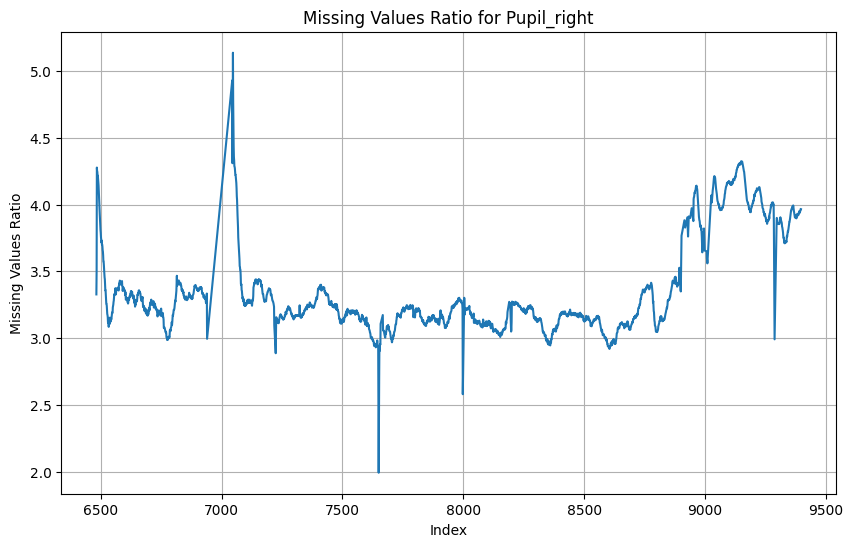

In [136]:
import matplotlib.pyplot as plt

# Find the row with the maximum missing ratio for Pupil_right
max_missing_ratio_index = combined_data['Pupil_right_missing_ratio'].idxmax()
row_with_max_missing_ratio = combined_data.loc[max_missing_ratio_index]

# Plot the missing values ratio for Pupil_right as a line plot
plt.figure(figsize=(10, 6))
plt.plot(row_with_max_missing_ratio['Pupil_right'], linestyle='-')
plt.title('Missing Values Ratio for Pupil_right')
plt.xlabel('Index')
plt.ylabel('Missing Values Ratio')
plt.grid(True)
plt.show()


In [137]:
combined_data["game_type"].unique()

array(['task switch', 'working memory', 'enumeration'], dtype=object)

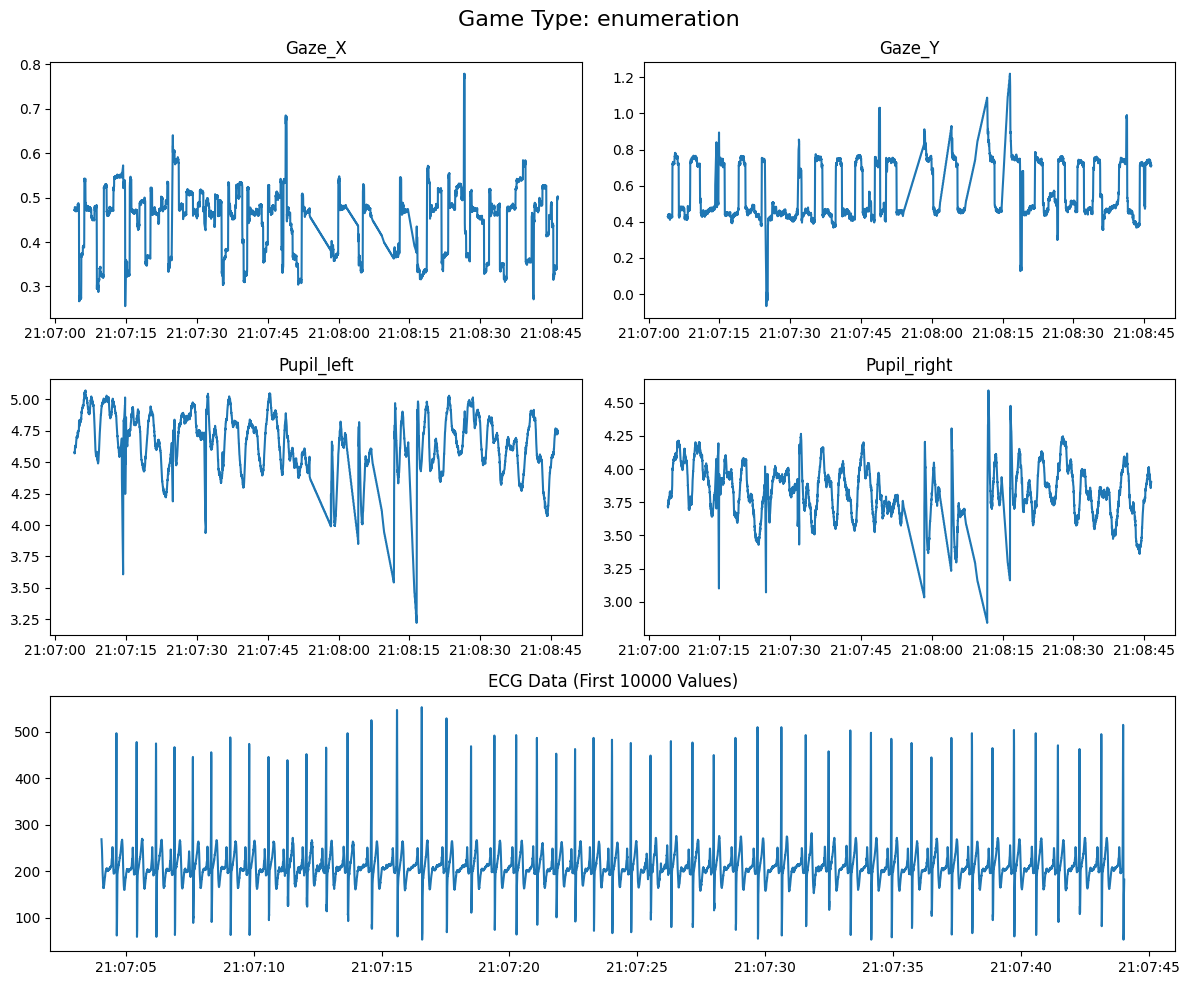

In [156]:
# Choose a random row index
random_row_index = random.randint(0, len(combined_data) - 1)

# Select the random row
random_row = combined_data.iloc[random_row_index]

# Extract the time-series data for plotting
gaze_x = random_row['Gaze_X']
gaze_y = random_row['Gaze_Y']
pupil_left = random_row['Pupil_left']
pupil_right = random_row['Pupil_right']
ecg_data = random_row['ecg_data'][:10000]  # Extract first 1000 values
Dates_eye = random_row['Dates_eye']
Dates_sensor = random_row['Dates_sensor'][:10000]  # Extract first 1000 values
game_type = random_row['game_type']  # Extract game_type

# Plotting
plt.figure(figsize=(12, 10))  # Increase the figure size to accommodate the larger subplot

plt.suptitle(f'Game Type: {game_type}', fontsize=16)  # Set the title for the entire figure

plt.subplot(3, 2, (5, 6))  # Combine the last two subplots into one
plt.plot(Dates_sensor, ecg_data)
plt.title('ECG Data (First 10000 Values)')

plt.subplot(3, 2, 1)
plt.plot(Dates_eye, gaze_x)
plt.title('Gaze_X')

plt.subplot(3, 2, 2)
plt.plot(Dates_eye, gaze_y)
plt.title('Gaze_Y')

plt.subplot(3, 2, 3)
plt.plot(Dates_eye, pupil_left)
plt.title('Pupil_left')

plt.subplot(3, 2, 4)
plt.plot(Dates_eye, pupil_right)
plt.title('Pupil_right')

plt.tight_layout()
plt.show()


In [150]:
Dates_eye

[Timestamp('2024-02-14 19:41:40.996577792'),
 Timestamp('2024-02-14 19:41:41.013752064'),
 Timestamp('2024-02-14 19:41:41.029448960'),
 Timestamp('2024-02-14 19:41:41.046769920'),
 Timestamp('2024-02-14 19:41:41.063628032'),
 Timestamp('2024-02-14 19:41:41.079660800'),
 Timestamp('2024-02-14 19:41:41.096678912'),
 Timestamp('2024-02-14 19:41:41.113377024'),
 Timestamp('2024-02-14 19:41:41.130868992'),
 Timestamp('2024-02-14 19:41:41.148903168'),
 Timestamp('2024-02-14 19:41:41.162659840'),
 Timestamp('2024-02-14 19:41:41.179316992'),
 Timestamp('2024-02-14 19:41:41.196686080'),
 Timestamp('2024-02-14 19:41:41.213665024'),
 Timestamp('2024-02-14 19:41:41.229570048'),
 Timestamp('2024-02-14 19:41:41.246457088'),
 Timestamp('2024-02-14 19:41:41.262688'),
 Timestamp('2024-02-14 19:41:41.279782912'),
 Timestamp('2024-02-14 19:41:41.296568064'),
 Timestamp('2024-02-14 19:41:41.312851200'),
 Timestamp('2024-02-14 19:41:41.329641984'),
 Timestamp('2024-02-14 19:41:41.345249024'),
 Timestamp('2

In [164]:
from scipy.stats import zscore

# Define a custom function to calculate z-scores while preserving NaN values within each list
def calculate_zscores_with_nan(lst):
    # Convert the list to a NumPy array
    np_array = np.array(lst)
    
    # Check if the array contains any non-numeric values
    if np.issubdtype(np_array.dtype, np.number):
        # Calculate the z-scores while preserving NaN values
        zscores = zscore(np_array, nan_policy='omit')
        return zscores.tolist()
    else:
        # If the array contains non-numeric values, return the original list
        return lst


# Create a new DataFrame 'combined_data_zscore' by applying the custom function to the specified columns
combined_data_zscore = combined_data.copy()  # Make a copy of the original DataFrame

# Apply the custom function to calculate z-scores (preserving NaN values within each list)
combined_data_zscore['Gaze_X'] = combined_data_zscore['Gaze_X'].apply(calculate_zscores_with_nan)
combined_data_zscore['Gaze_Y'] = combined_data_zscore['Gaze_Y'].apply(calculate_zscores_with_nan)
combined_data_zscore['Pupil_left'] = combined_data_zscore['Pupil_left'].apply(calculate_zscores_with_nan)
combined_data_zscore['Pupil_right'] = combined_data_zscore['Pupil_right'].apply(calculate_zscores_with_nan)
combined_data_zscore['ecg_data'] = combined_data_zscore['ecg_data'].apply(calculate_zscores_with_nan)

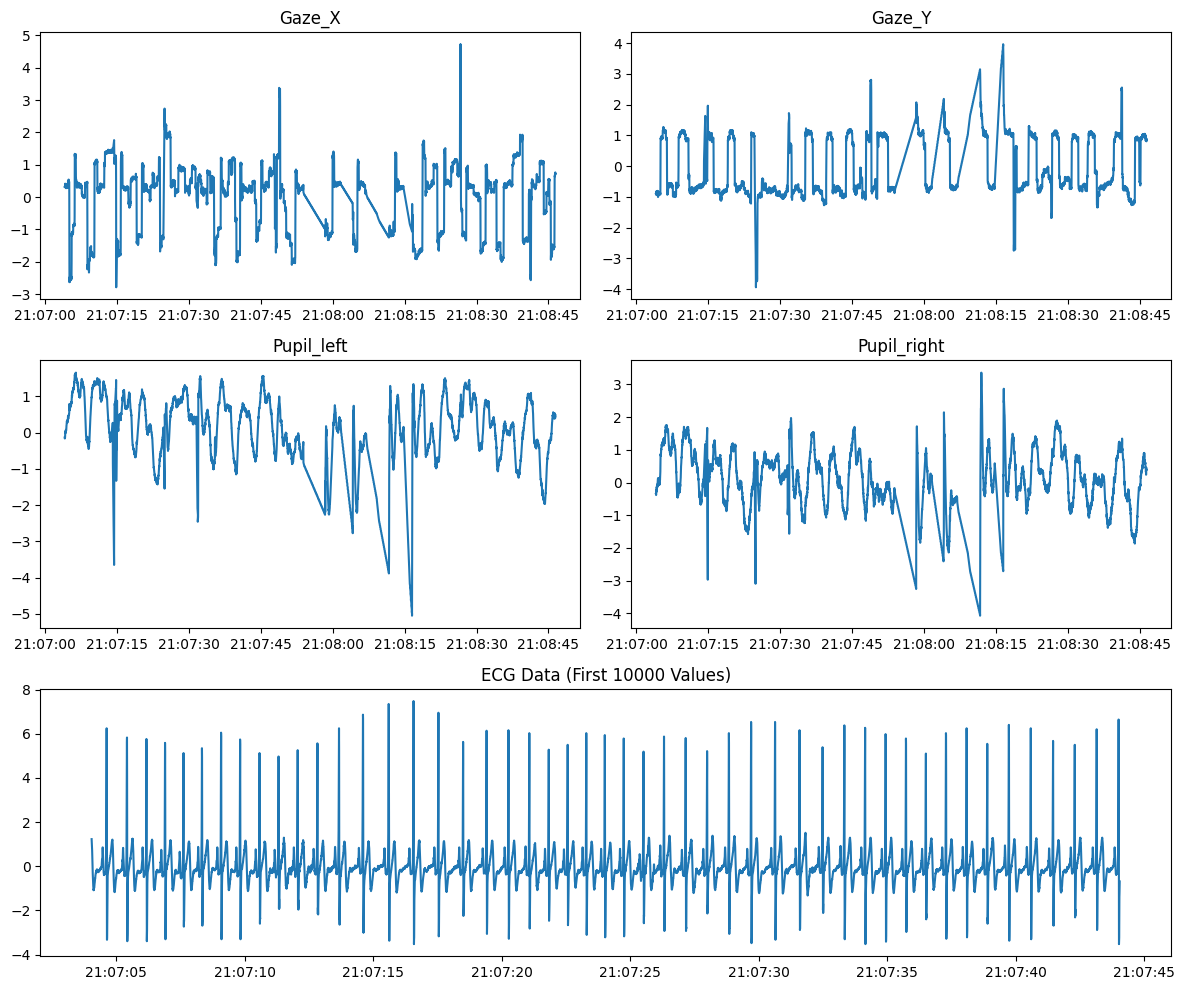

In [165]:
# Select the random row
random_row = combined_data_zscore.iloc[random_row_index]

# Choose a random row index
random_row_index = random.randint(0, len(combined_data) - 1)

# Extract the time-series data for plotting
gaze_x = random_row['Gaze_X']
gaze_y = random_row['Gaze_Y']
pupil_left = random_row['Pupil_left']
pupil_right = random_row['Pupil_right']
ecg_data = random_row['ecg_data']  # Extract first 1000 values
Dates_eye = random_row['Dates_eye']
Dates_sensor = random_row['Dates_sensor']

# Plotting
plt.figure(figsize=(12, 10))  # Increase the figure size to accommodate the larger subplot

plt.subplot(3, 2, (5, 6))  # Combine the last two subplots into one
plt.plot(Dates_sensor[:10000], ecg_data[:10000])
plt.title('ECG Data (First 10000 Values)')

plt.subplot(3, 2, 1)
plt.plot(Dates_eye, gaze_x)
plt.title('Gaze_X')

plt.subplot(3, 2, 2)
plt.plot(Dates_eye, gaze_y)
plt.title('Gaze_Y')

plt.subplot(3, 2, 3)
plt.plot(Dates_eye, pupil_left)
plt.title('Pupil_left')

plt.subplot(3, 2, 4)
plt.plot(Dates_eye, pupil_right)
plt.title('Pupil_right')

plt.tight_layout()
plt.show()


In [166]:
combined_data_zscore['Gaze_X']

0      [-0.6864422772325834, -1.073517745150887, -1.5...
1      [-0.6926853449163907, 1.2385518948104446, 1.06...
2      [-0.42009216381186154, 0.3419476932773193, -0....
3      [0.0076868381830522935, -0.11056005073589163, ...
4      [-0.31528626045684177, -0.33840293024155893, -...
                             ...                        
462    [-1.2956513308030804, -1.4376503189484693, -1....
463    [-0.096138082019941, -0.11148366866484621, -0....
464    [1.2615463169828485, 1.229513163572979, 1.2427...
465    [0.16732142324700963, 0.1689112544324904, 0.17...
466    [1.5815351095078038, 1.5515517069993319, 1.552...
Name: Gaze_X, Length: 467, dtype: object

In [167]:
combined_data['Difficulty']

0        Easy
1      Medium
2        Hard
3        Easy
4      Medium
        ...  
462    Medium
463      Hard
464      Easy
465    Medium
466      Hard
Name: Difficulty, Length: 467, dtype: object

In [168]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Difficulty' column
combined_data_zscore['Difficulty_encoded'] = label_encoder.fit_transform(combined_data_zscore['Difficulty'])

# Display the mapping of encoded labels to original labels
print("Encoded labels:", label_encoder.classes_)

# Display the encoded 'Difficulty' column
print(combined_data_zscore['Difficulty_encoded'])


Encoded labels: ['Easy' 'Hard' 'Medium']
0      0
1      2
2      1
3      0
4      2
      ..
462    2
463    1
464    0
465    2
466    1
Name: Difficulty_encoded, Length: 467, dtype: int64


In [169]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Difficulty' column
combined_data['Difficulty_encoded'] = label_encoder.fit_transform(combined_data['Difficulty'])

# Display the mapping of encoded labels to original labels
print("Encoded labels:", label_encoder.classes_)

# Display the encoded 'Difficulty' column
print(combined_data['Difficulty_encoded'])


Encoded labels: ['Easy' 'Hard' 'Medium']
0      0
1      2
2      1
3      0
4      2
      ..
462    2
463    1
464    0
465    2
466    1
Name: Difficulty_encoded, Length: 467, dtype: int64


In [170]:
from sklearn.model_selection import train_test_split

# Assuming combined_data contains our features and target variable (Difficulty level)
# Prepare the data

# X contains our features: gaze_x, gaze_y, pupil_left, pupil_right
# y contains our target variable: difficulty level
X = combined_data_zscore[['Gaze_X', 'Gaze_Y', 'Pupil_left', 'Pupil_right']]
y = combined_data_zscore['Difficulty_encoded']  # Assuming 'Difficulty_encoded' is our target variable

# Split the data into training and test sets
# Here, we allocate 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
# Check the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (373, 4)
X_test shape: (94, 4)
y_train shape: (373,)
y_test shape: (94,)


In [172]:
X_train

,Gaze_X,Gaze_Y,Pupil_left,Pupil_right
382,"[0.026682927430215428, 0.00694627807189148, -0...","[-0.19874731616041477, -0.2295823726571997, -0...","[0.007337787555570275, -0.10891722573449367, -...","[-0.43694815080104615, -0.5672671148555323, -0..."
22,"[-0.5447476508070269, -0.5584051740263648, -0....","[0.16578777270875422, 0.11621062473493962, -0....","[-0.38671712989783213, -0.5217052087517494, -0...","[0.3372056894005976, 0.21170431493497036, 0.03..."
305,"[-0.0011267756162081915, 0.03017686672131626, ...","[0.40601755011823426, 0.33366990398202806, 0.3...","[-0.6697855291687534, -0.6898306799824327, -0....","[-0.8294891991530058, -0.8310634927940682, -0...."
46,"[7.32605366783075, 8.255261309084926, 7.800386...","[8.697191290954803, 8.95802764939672, 8.947798...","[3.3949203916712904, 3.469449061435, 3.4619961...","[3.0358393546865563, 3.0751968270153585, 3.092..."
153,"[-12.883607244496927, -12.831638819839084, -12...","[11.316639050799598, 11.201316877658083, 11.26...","[0.8067784070258671, 0.7804320137228873, 0.715...","[0.6184374559375868, 0.5313335262986976, 0.503..."
...,...,...,...,...
106,"[0.3282379495387255, 0.3953623004441496, 0.435...","[-0.284694934037006, -0.2601851426287703, -0.2...","[-0.02882122728381531, 0.08402660335868882, 0....","[-0.1518319417660424, -0.0811104349599165, -0...."
270,"[-0.7720657062277577, -0.7881657108891662, -0....","[-1.584184034742314, -1.5919977446911073, -1.6...","[0.2604793256042002, 0.25776465336455007, 0.30...","[0.6699804905509309, 0.6980834116359266, 0.751..."
348,"[0.7150684928697544, 0.7265090592876292, 0.725...","[-0.590443948897556, -0.6719727481890626, -0.6...","[0.36999135402382766, 0.42784673952883256, 0.4...","[1.0791817439407723, 0.996513158017999, 1.0492..."
435,"[0.23256229822222257, 0.2585526986819094, 0.21...","[-0.7199331375390016, -0.6985241993561573, -0....","[2.2462015623083134, 2.2988798161541233, 2.220...","[2.0104432113530475, 1.863741512490163, 1.8083..."
